# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [4]:
%config InlineBackend.figure_format = 'retina'

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('train.csv')
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop(labels='dropoff_datetime', axis=1)
df

id  vendor_id      pickup_datetime  passenger_count  \
0        id2875421          2  2016-03-14 17:24:55                1   
1        id2377394          1  2016-06-12 00:43:35                1   
2        id3858529          2  2016-01-19 11:35:24                1   
3        id3504673          2  2016-04-06 19:32:31                1   
4        id2181028          2  2016-03-26 13:30:55                1   
...            ...        ...                  ...              ...   
1458639  id2376096          2  2016-04-08 13:31:04                4   
1458640  id1049543          1  2016-01-10 07:35:15                1   
1458641  id2304944          2  2016-04-22 06:57:41                1   
1458642  id2714485          1  2016-01-05 15:56:26                1   
1458643  id1209952          1  2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

In [7]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

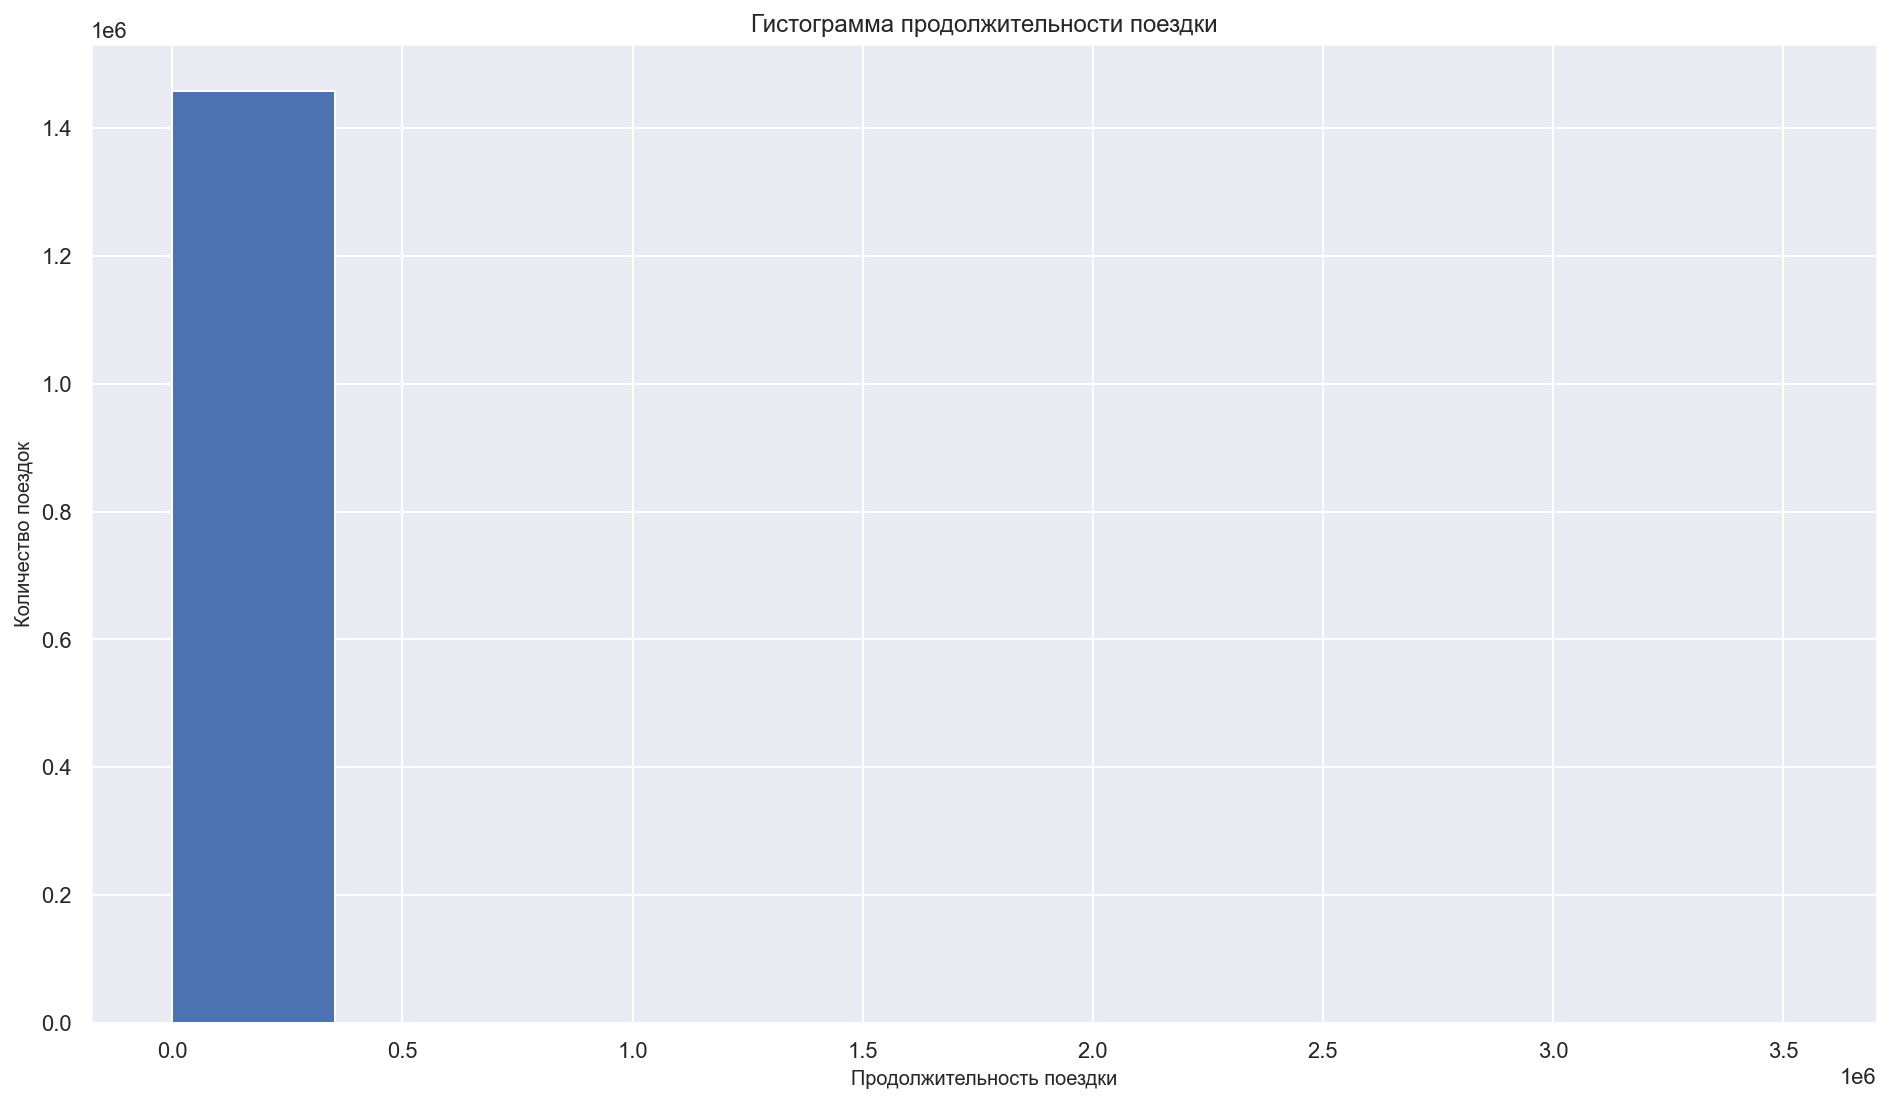

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(16, 9))
plt.hist(df['trip_duration'])
plt.title('Гистограмма продолжительности поездки', fontsize=12)
plt.xlabel('Продолжительность поездки', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: У целевой переменной есть сильные выбросы значений (все пустое пространство на графике справа от одного большого bar, этих выбросов даже не видно в этом масштабе)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: как можно видеть, у нас есть достаточно сильные выбросы, а как мы знаем из лекций про RMSLE:
> За счёт логарифмирования ответов и прогнозов мы скорее штрафуем за отклонения в порядке величин, чем за отклонения в их значениях

Поэтому я думаю, что RMSLE лучше справится с задачей, чем RMSE, поэтому это и выбрали

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

посмотрим на формулу RMSLE, но подставим полученные выше замены:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a} (x_i)\big)^2}$$

А теперь посмотрим на MSE (просто по определению):
$$\text{MSE}(X, \hat y, \hat a) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a} (x_i)\big)^2$$


А следовательно:
$$\text{RMSLE}(X, y, a) = \sqrt{\text{MSE}(X, \hat y, \hat a)}$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

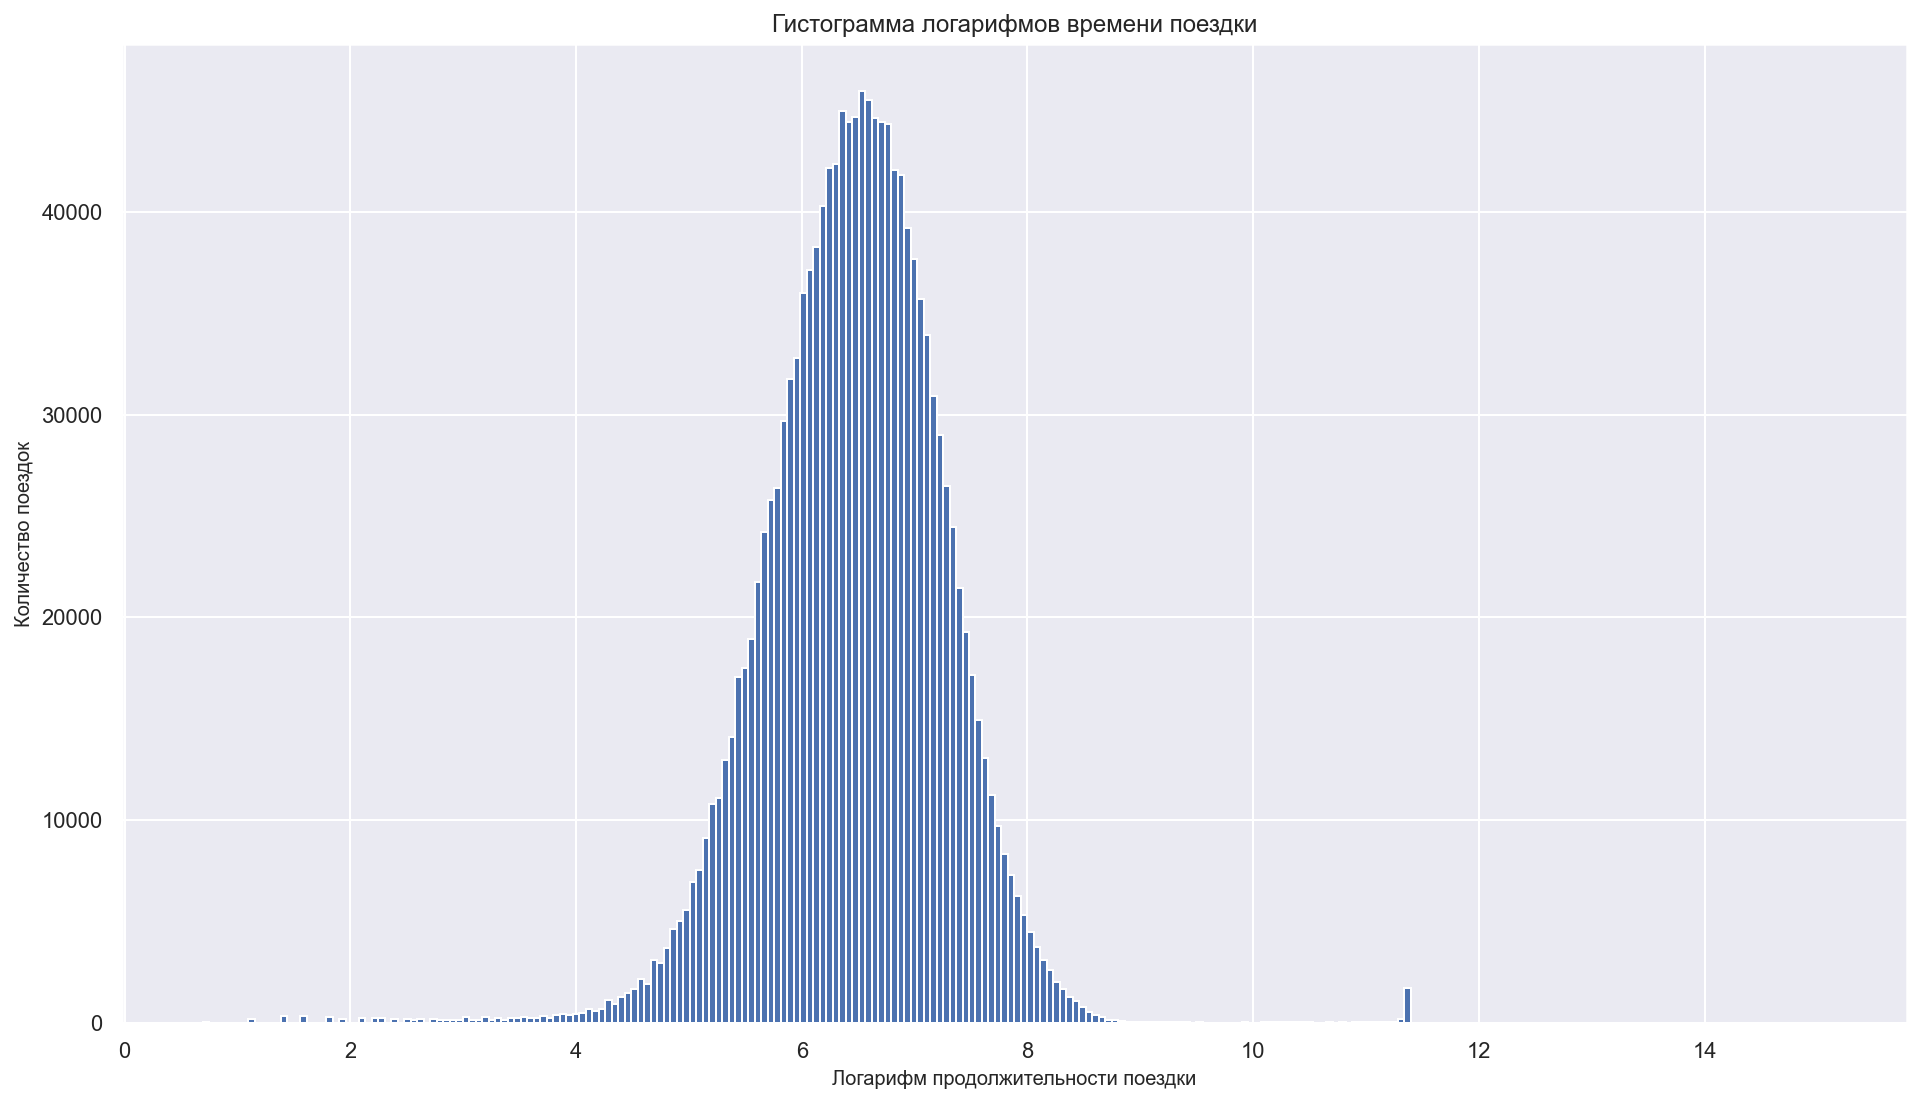

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# добавляю логарифм и удаляю trip duration
df['log_trip_duration'] = df['trip_duration'].apply(np.log1p)

# удаляю старый таргет
df = df.drop(columns=['trip_duration']) 

# рисую график
plt.figure(figsize=(16, 9))
plt.hist(df['log_trip_duration'], bins=250)
plt.title('Гистограмма логарифмов времени поездки', fontsize=12)
plt.xlabel('Логарифм продолжительности поездки', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# вернулся из будущих заданий и переделал под функцию mse (изначально ручками считал)
from sklearn.metrics import mean_squared_error

y = df['log_trip_duration'] # целевая переменная
y_mean = df['log_trip_duration'].mean() # с семинара знаем, что mean() - лучшее конст.предсказание
y_pred = y_mean * np.ones(df.shape[0]) # для каждой строчки ставим mean()
rmse = mean_squared_error(y, y_pred, squared=False) # считаем ошибку
print(f'Для константного предсказания получаем метрику: {rmse}')

Для константного предсказания получаем метрику: 0.7957592365411504


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

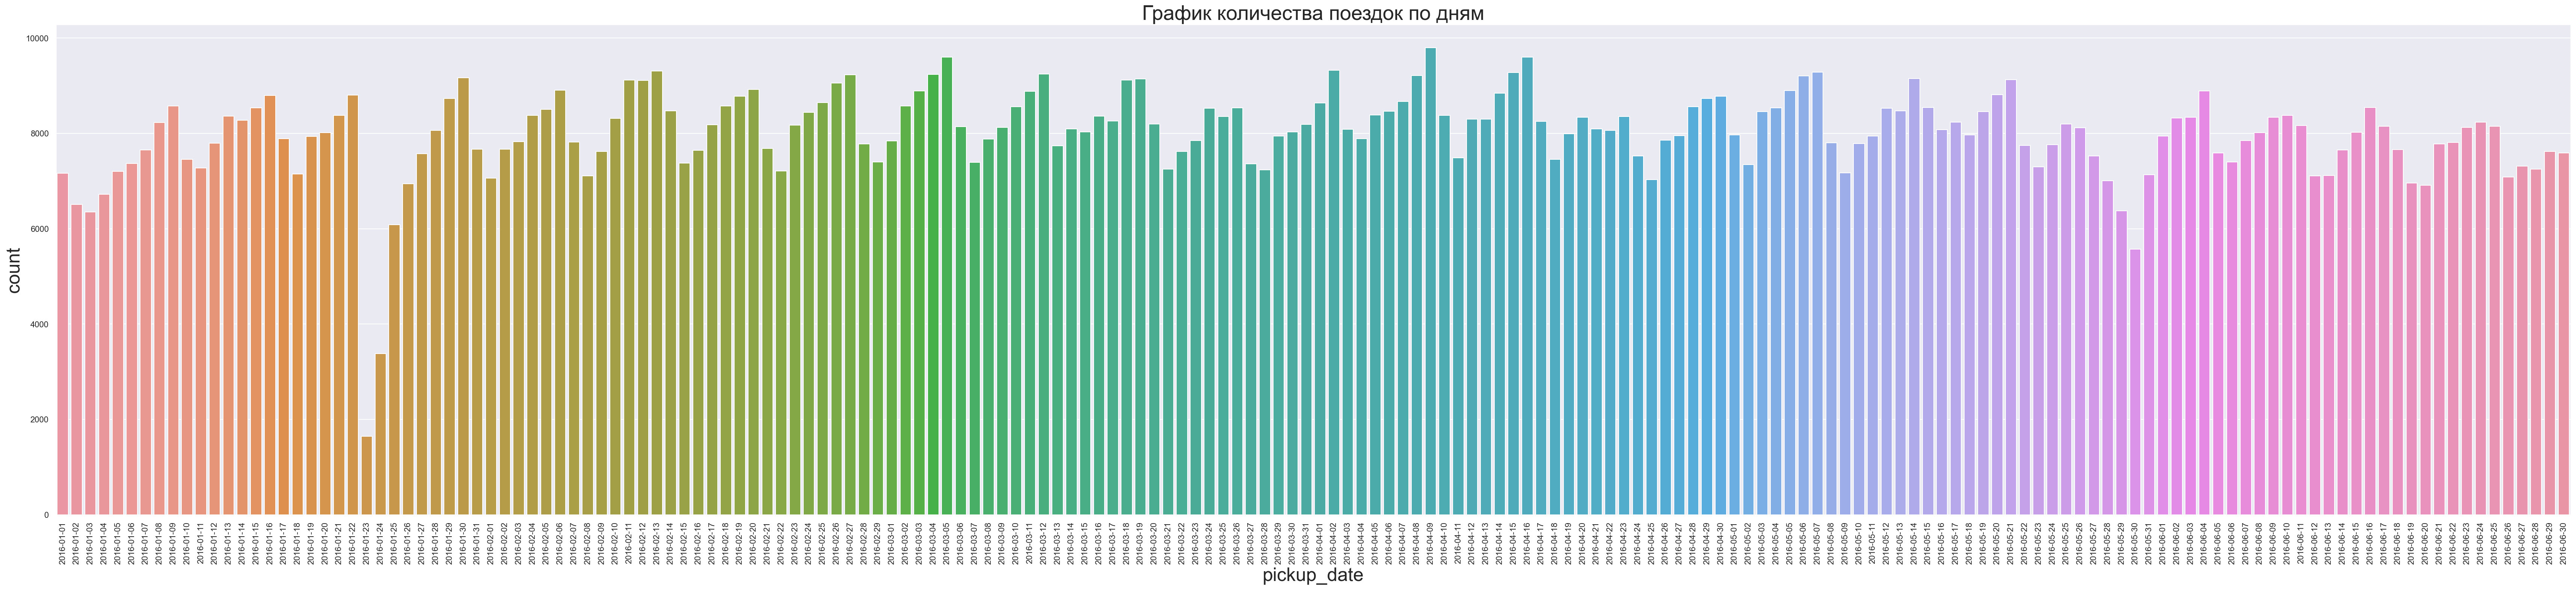

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# возвращаюсь из будущего задания и добавляю сразу все нужные признаки в одном месте
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday # 0 - monday, 6 - sunday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
# для номера дня в году нашел
# https://stackoverflow.com/questions/620305/convert-year-month-day-to-day-of-year-in-python
df['pickup_yearday'] = df['pickup_datetime'].apply(lambda date: date.timetuple().tm_yday)

# рисую график
plt.figure(figsize=(60, 12))
plt.title('График количества поездок по дням', fontsize=27)
plt.xlabel('День', fontsize=25)
plt.ylabel('Количество поездок', fontsize=25)
plt.xticks(rotation=90)
sns.countplot(data=df.sort_values(by='pickup_date'), x='pickup_date')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: 

* Первый скачок вниз видим 23-24 января 2016 года, гуглим, что тогда было в Нью-Йорке:
> Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури

* Второй скачок вниз произошел 29-30 мая 2016, в то время был Memorial Day

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

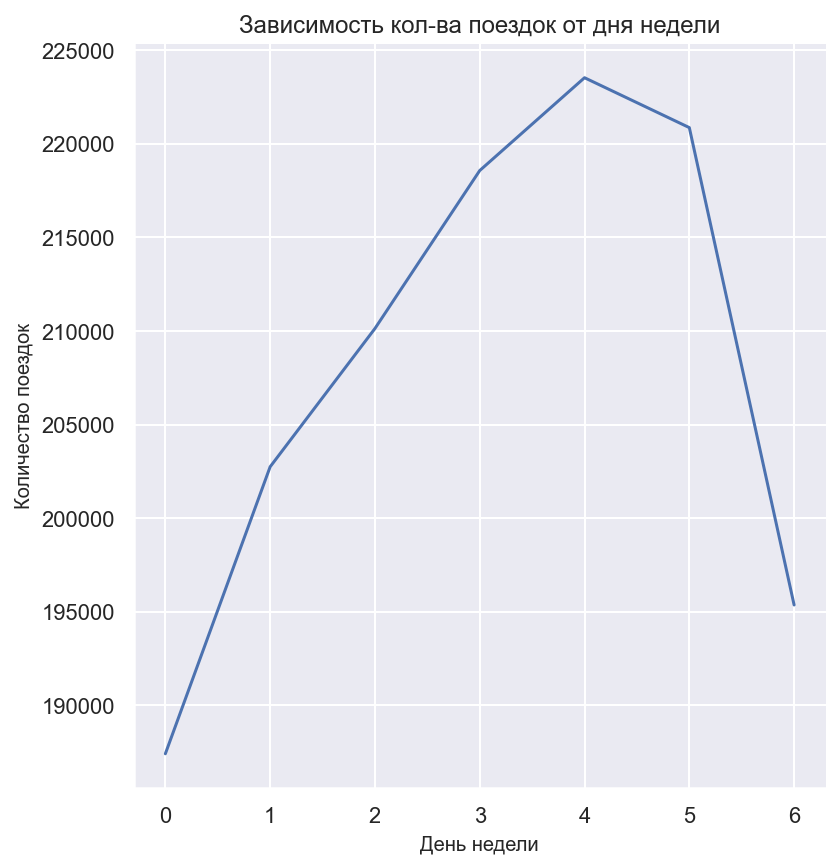

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
weekday_count = df.groupby('pickup_weekday').count()
sns.relplot(data=weekday_count, x='pickup_weekday', y='id', kind='line', height=6)
plt.title('Зависимость кол-ва поездок от дня недели', fontsize=12)
plt.xlabel('День недели', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

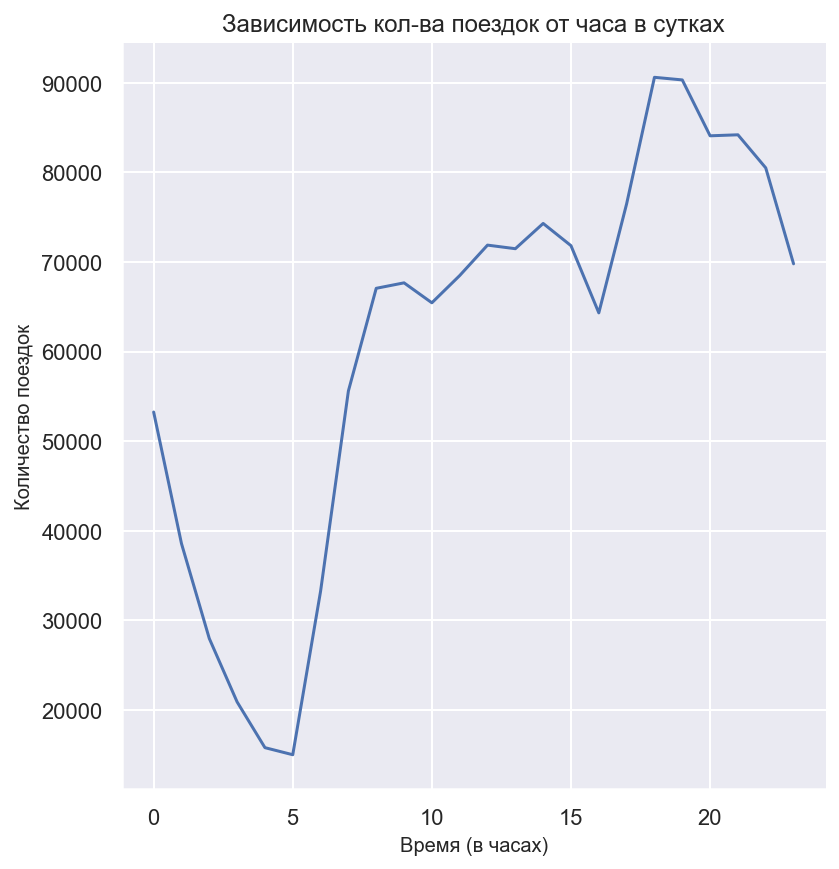

In [14]:
hour_count = df.groupby('pickup_hour').count()
sns.relplot(data=hour_count, x='pickup_hour', y='id', kind="line", height=6)
plt.title('Зависимость кол-ва поездок от часа в сутках', fontsize=12)
plt.xlabel('Время (в часах)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

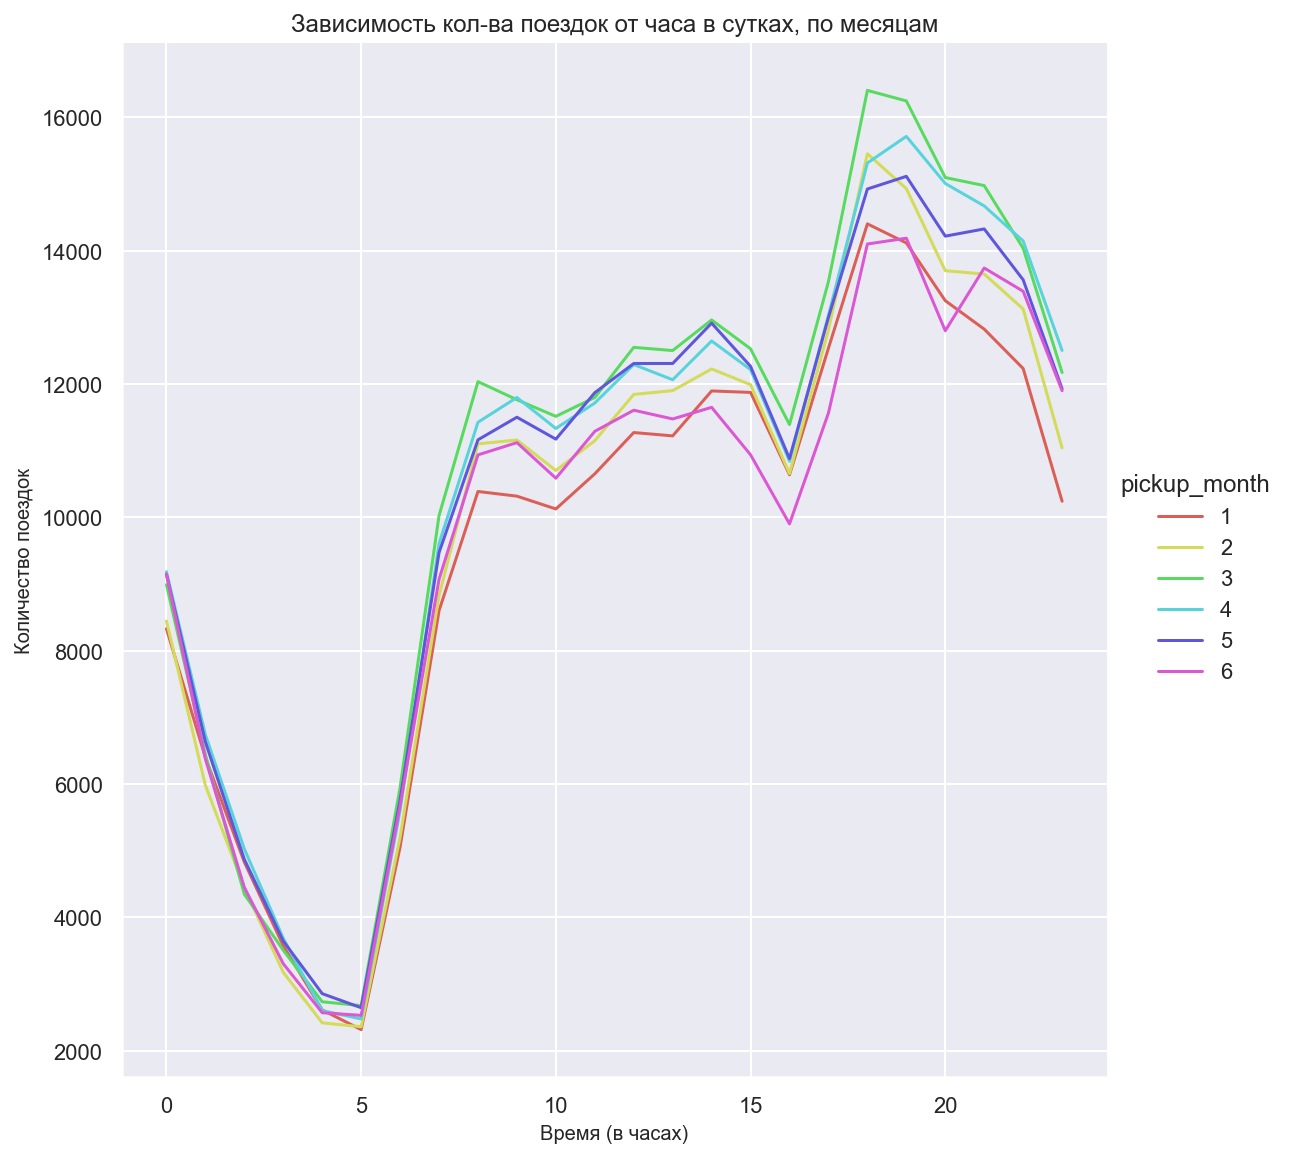

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
hour_month_count = df.groupby(['pickup_hour', 'pickup_month']).count()
sns.relplot(data=hour_month_count, x='pickup_hour', y='id', hue='pickup_month', kind='line', height=8, palette=sns.color_palette('hls', 6))
plt.title('Зависимость кол-ва поездок от часа в сутках, по месяцам', fontsize=12)
plt.xlabel('Время (в часах)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

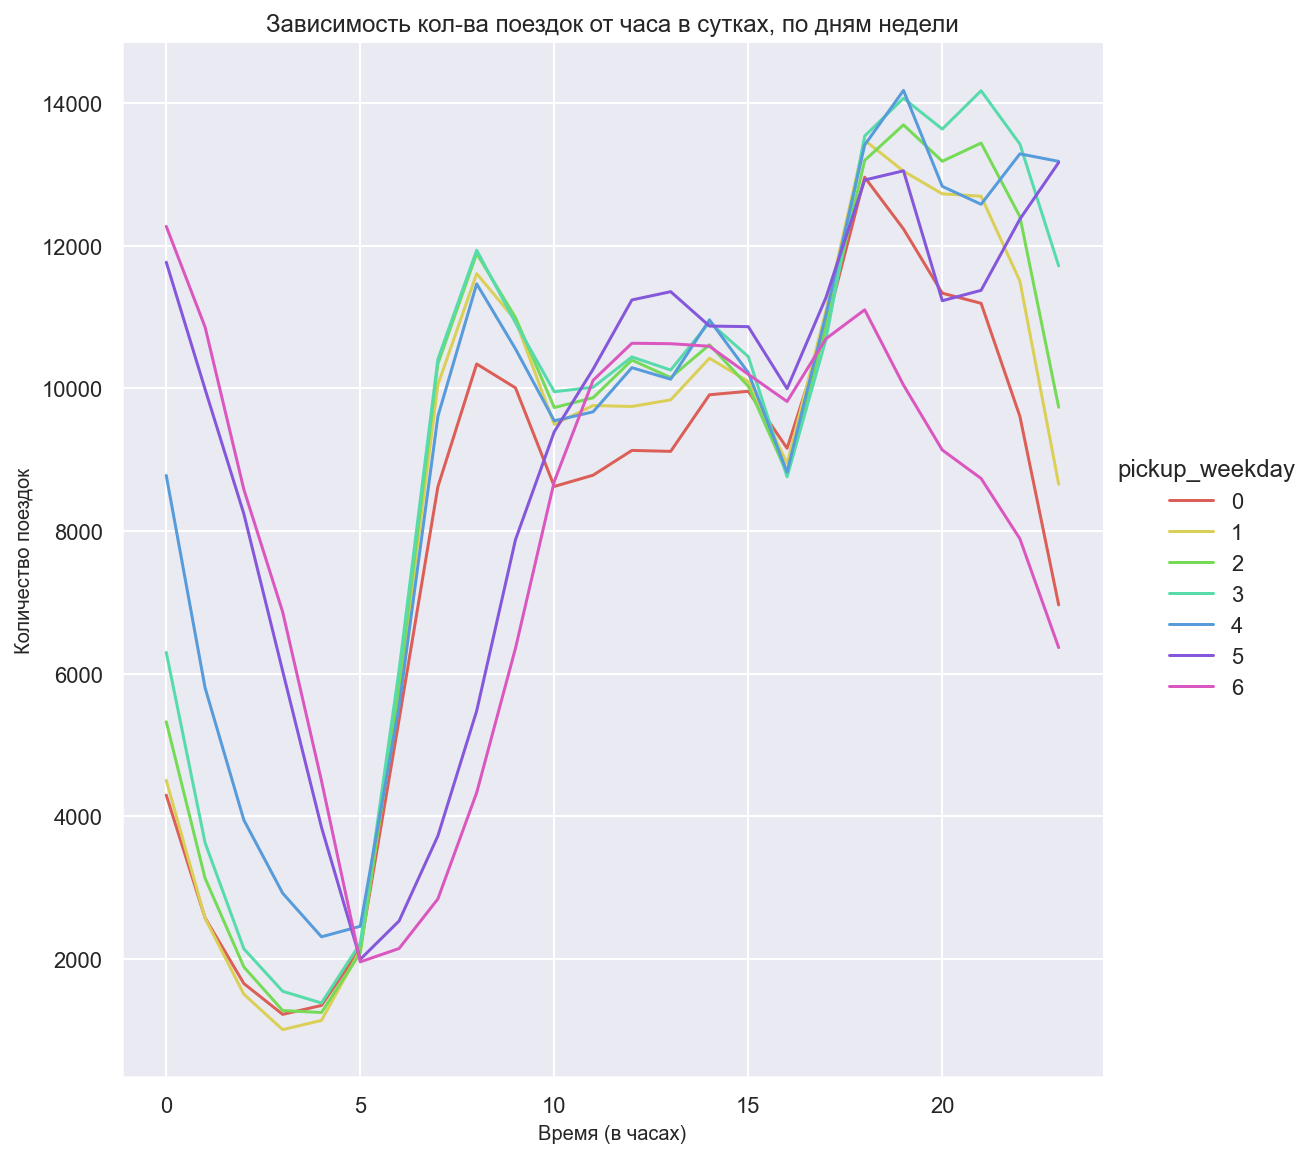

In [16]:
hour_weekday_count = df.groupby(['pickup_hour', 'pickup_weekday']).count()
sns.relplot(data=hour_weekday_count, x='pickup_hour', y='id', hue='pickup_weekday', kind='line', height=8, palette=sns.color_palette('hls', 7))
plt.title('Зависимость кол-ва поездок от часа в сутках, по дням недели', fontsize=12)
plt.xlabel('Время (в часах)', fontsize=10)
plt.ylabel('Количество поездок', fontsize=10)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: 

* Дни недели: выделяются выходные, люди меньше ездят на работу и т.д, трафик в целом меньше, при этом люди больше отдыхают (поздно возвращаются домой, ночных поездок больше)

* Месяца: примерно одинаковое количество поездок, разве что в июне меньше поездок, возможно люди уезжают в отпуска

* Время суток: очевидно выделяется ночь, ночью люди спят и поездок сильно меньше, утром и к вечеру поездок больше всего, люди приезжают из дома и возвращаются домой обратно соотвественно


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

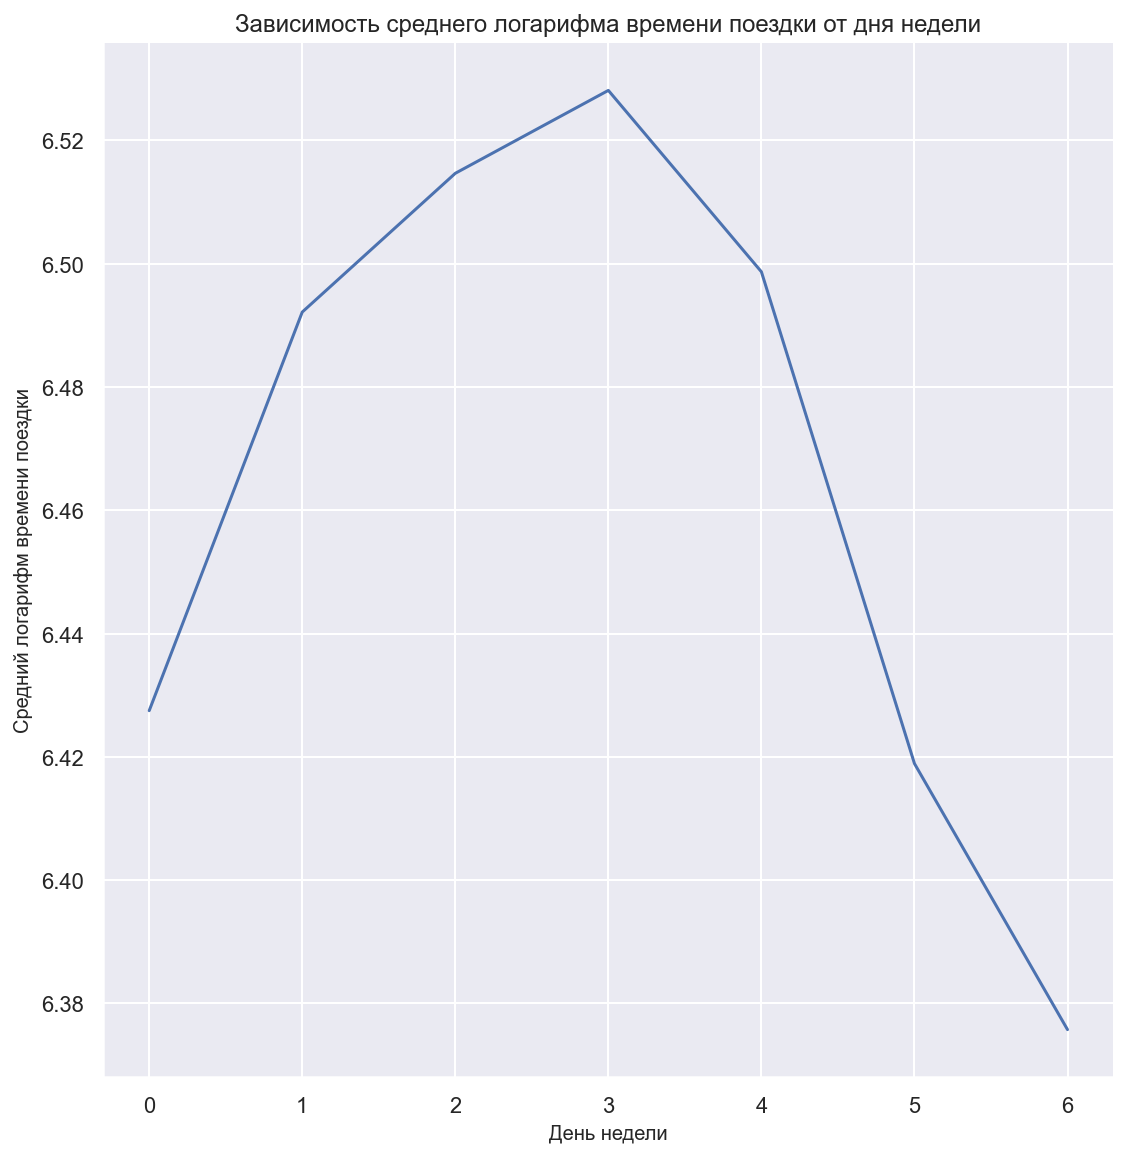

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

# разбиваем выборку
train, test = train_test_split(df, test_size=0.3, random_state=111)

# строим графики
weekday_mean = train.groupby('pickup_weekday').mean()
sns.relplot(data=weekday_mean, x='pickup_weekday', y='log_trip_duration', kind='line', height=8)
plt.title('Зависимость среднего логарифма времени поездки от дня недели', fontsize=12)
plt.xlabel('День недели', fontsize=10)
plt.ylabel('Средний логарифм времени поездки', fontsize=10)
plt.show()

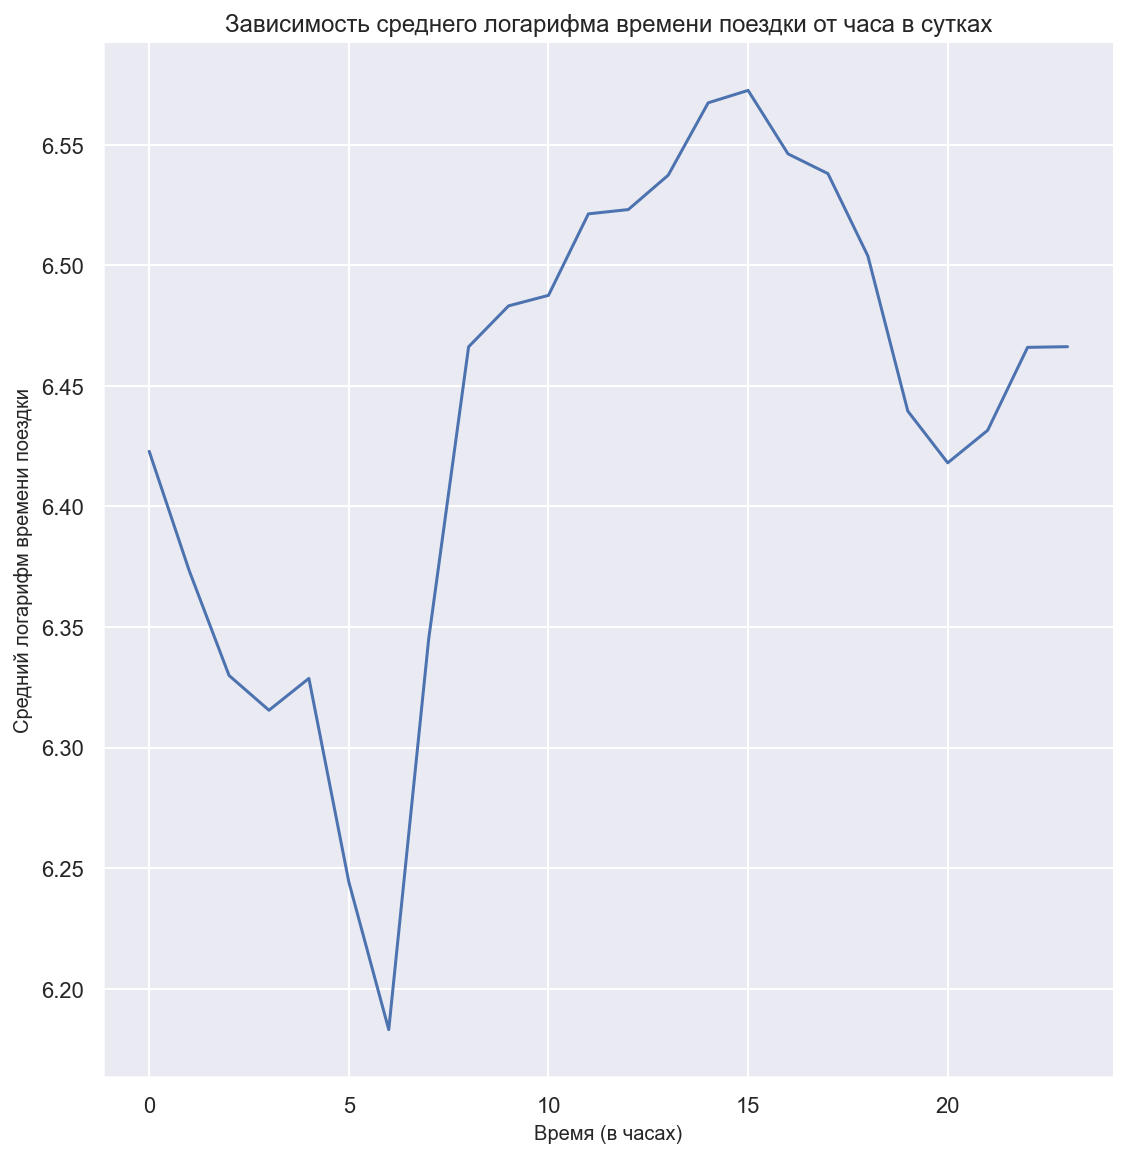

In [18]:
hour_mean = train.groupby('pickup_hour').mean()
sns.relplot(data=hour_mean, x='pickup_hour', y='log_trip_duration', kind='line', height=8)
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках', fontsize=12)
plt.xlabel('Время (в часах)', fontsize=10)
plt.ylabel('Средний логарифм времени поездки', fontsize=10)
plt.show()

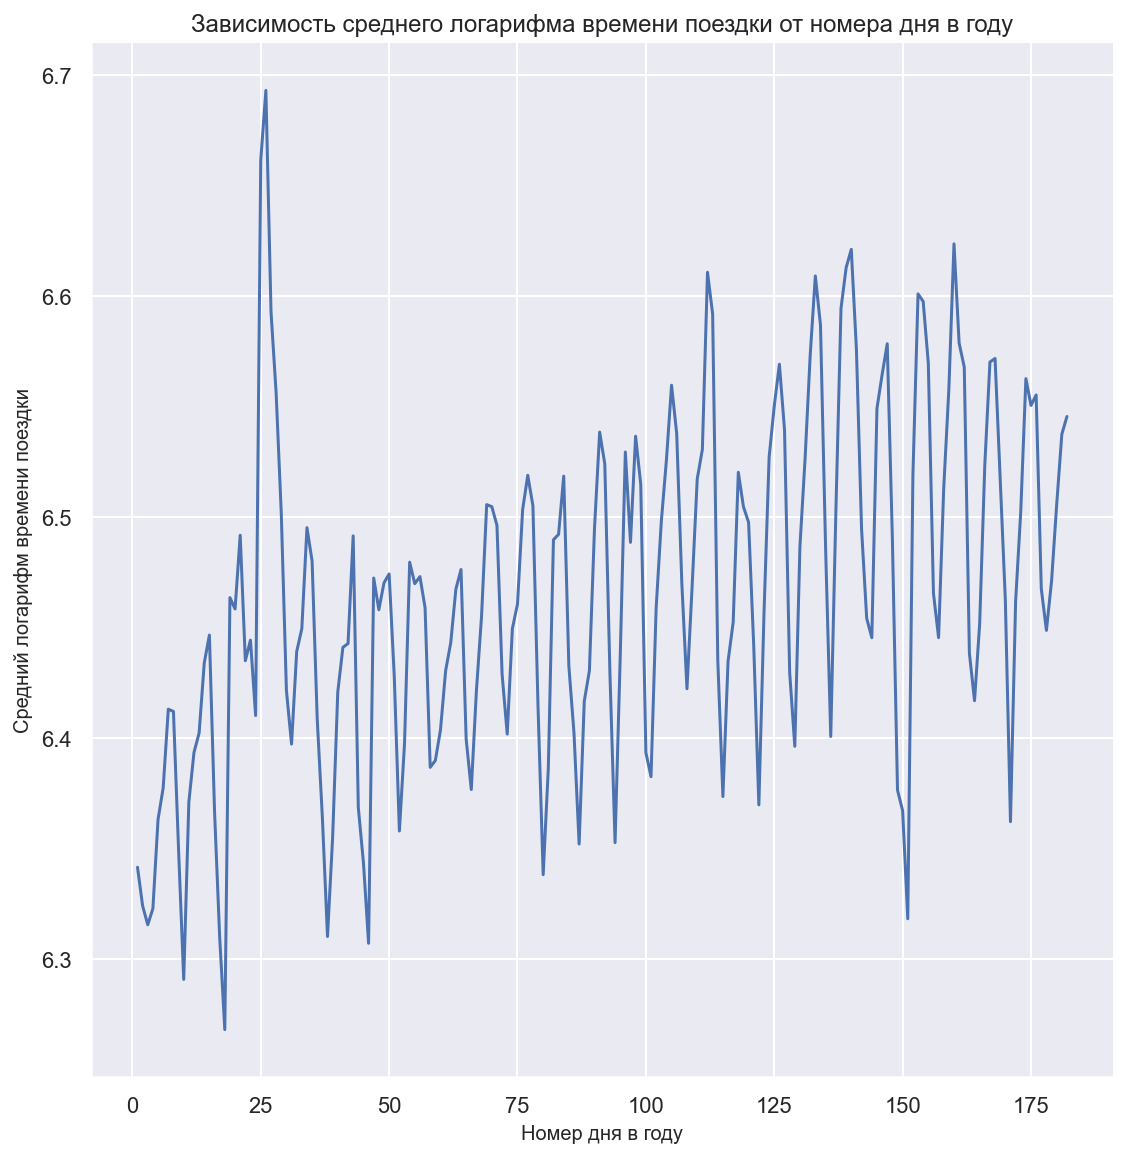

In [19]:
yearday_mean = train.groupby('pickup_yearday').mean()
sns.relplot(data=yearday_mean, x='pickup_yearday', y='log_trip_duration', kind='line', height=8)
plt.title('Зависимость среднего логарифма времени поездки от номера дня в году', fontsize=12)
plt.xlabel('Номер дня в году', fontsize=10)
plt.ylabel('Средний логарифм времени поездки', fontsize=10)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**:

* Графики похожи. Когда происходит больше всего поездок, тогда на дороге больше всего машин (логично), в Нью-Йорке (кажется) короткие и быстрые светофоры, люди начинают стоять в пробках, среднее время поездки растет, следовательно и таргет тоже растет, думаю из-за этого графики и похожи

* В два аномальных периода средний таргет падает вниз, думаю это работает аналогично вышесказанному, только в обратную сторону: машин становится мало, поездки проходят сильно быстрее

* Тренд - в целом график растет по мере движения к лету, почему - не знаю


Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

**Названия**:
1. День недели - pickup_weekday
2. Месяц - pickup_month
3. Час - pickup_hour
4. Является ли период аномальным - abnormal_winter, abnormal_summer
5. Номер дня в году -- pickup_yearday

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Уже все добавлено для заданий выше, осталось добавить только аномальные периоды

df['abnormal_winter'] = False
df['abnormal_summer'] = False


# спасибо https://oncalc.ru/calc/nomer-dnya за перевод даты в номер дня в году
df.loc[((23 <= df['pickup_yearday']) & (df['pickup_yearday'] <= 24)), 'abnormal_winter'] = True
df.loc[((149 <= df['pickup_yearday']) & (df['pickup_yearday'] <= 151)), 'abnormal_summer'] = True

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**:


(рассматриваю те, что добавили)
* Категориальные - pickup_hour, pickup_weekday, pickup_yearday, эти признаки точно категории, ну и бинарными являются признаки abnormal_winter, abnormal_summer
* Численные - pickup_month, хоть это и категория, но с увеличением месяца увеличивается логариф поездки, почему - опять же не знаю, но этим можно воспользоваться

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ:
# Ridge регрессия
from sklearn.linear_model import Ridge

# для категориальных признаков
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# для численных признаков
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
# снова делим на train/test, поскольку признаки я добавлял в df
train, test = train_test_split(df, test_size=0.3, random_state=111)

In [23]:
features = list(train.columns[-6:])
features

['pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'pickup_yearday',
 'abnormal_winter',
 'abnormal_summer']

In [24]:
categorical = ['pickup_hour', 'pickup_weekday', 'pickup_yearday']
numeric_features = ['pickup_month']

In [25]:
# разбиваю выборку
X_train = train[features]
X_test = test[features]

y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [26]:
# заимствую код с 2 семинара
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7874


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [27]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [28]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [29]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: выделяются точки аэропортов рядом с Манхэттеном и справа около Inwood 

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# использую код с семинара 1
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train.loc[:, 'haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['haversine_log'] = train['haversine'].apply(np.log1p)
test['haversine_log'] = test['haversine'].apply(np.log1p)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

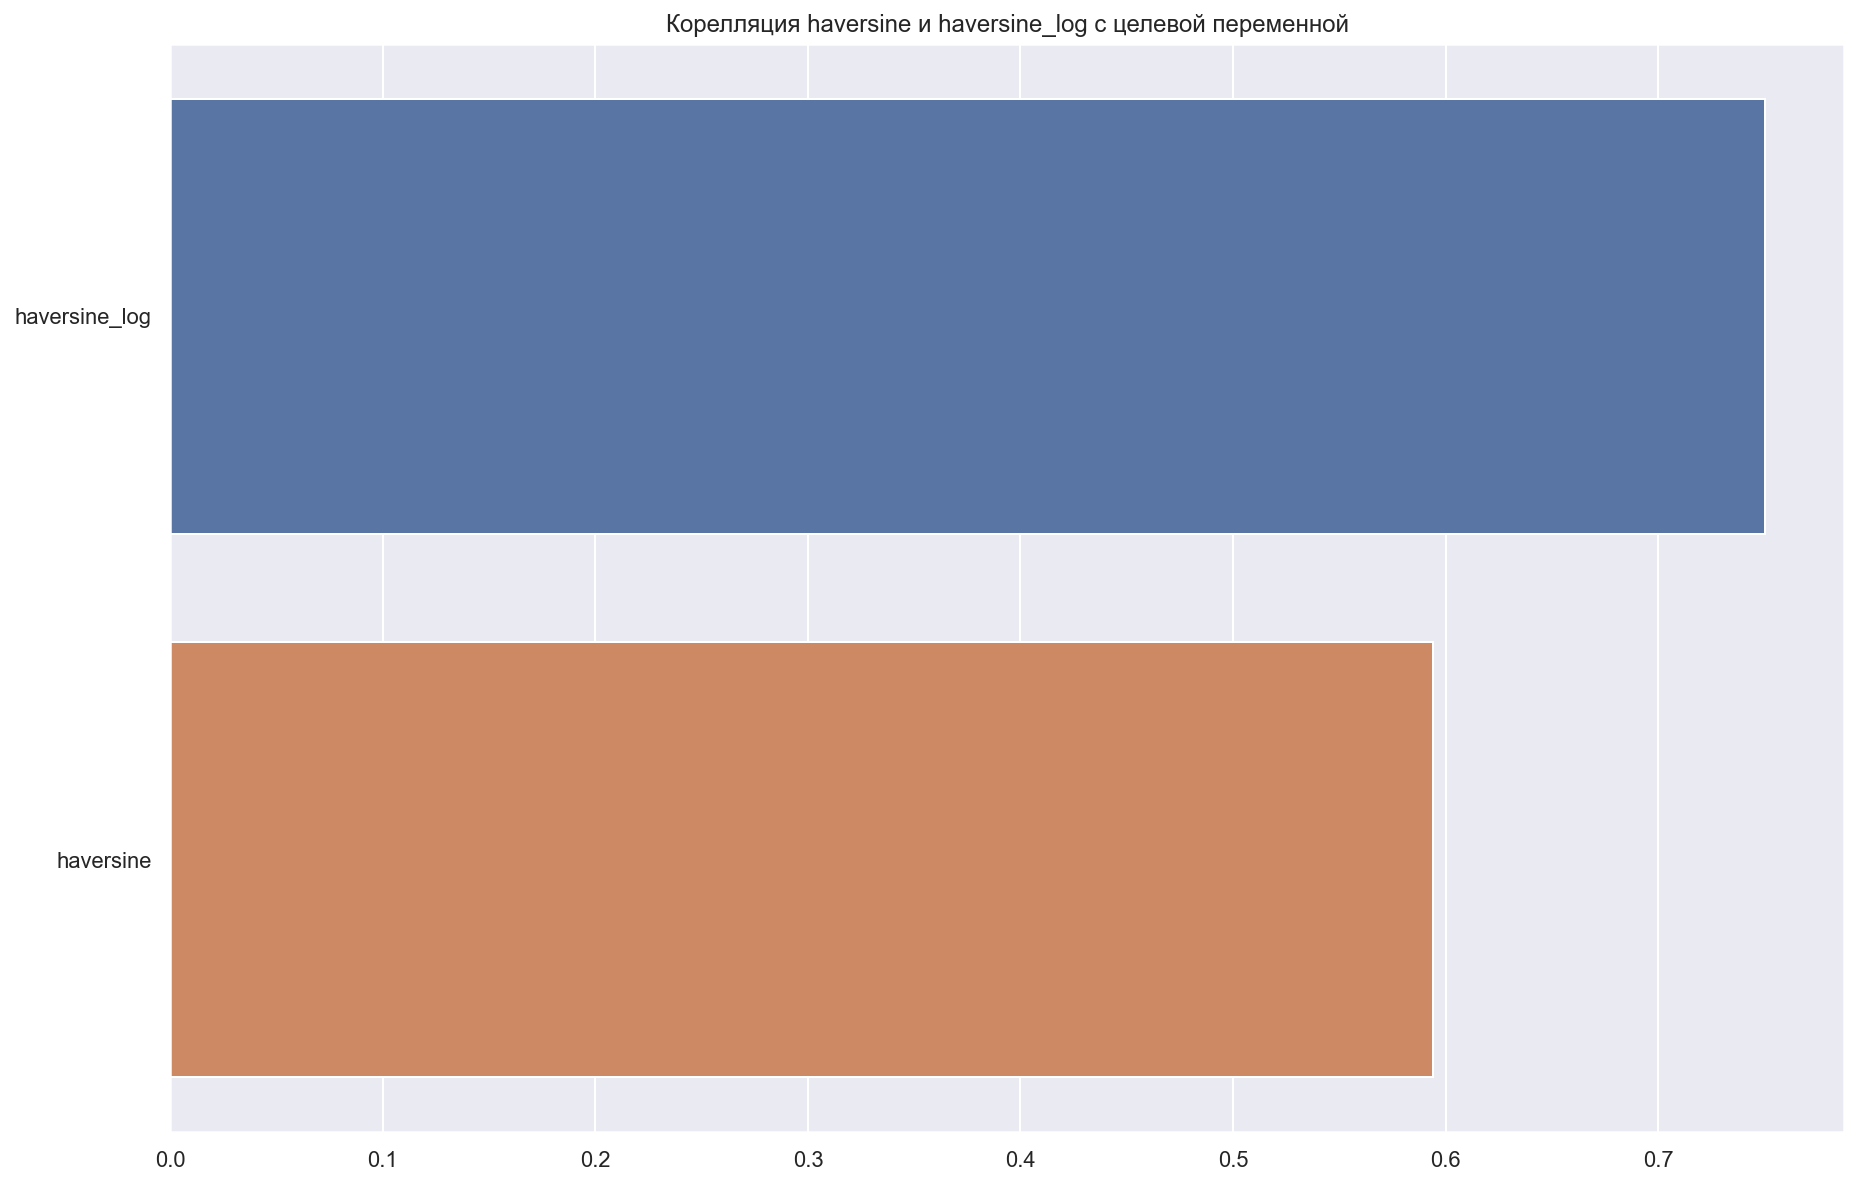

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# беру код с семинара 2
correlations = train[['haversine', 'haversine_log']].corrwith(train['log_trip_duration']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plt.title('Корелляция haversine и haversine_log с целевой переменной', fontsize=12)
plot.figure.set_size_inches(15, 10)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# с помощью функции из numpy возвращаю trip_duration
train['average_speed'] = train['haversine'] / np.expm1(train['log_trip_duration'])

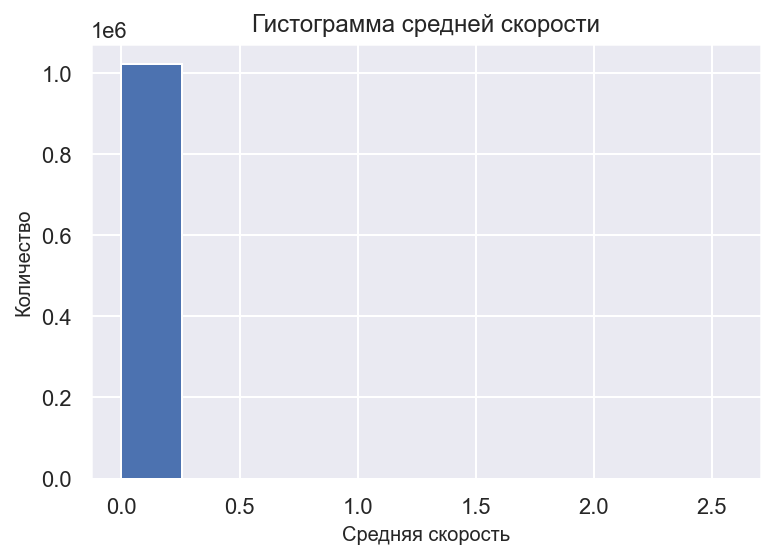

In [34]:
# рисуем гистограмму
plt.hist(train['average_speed'])
plt.title('Гистограмма средней скорости', fontsize=12)
plt.xlabel('Средняя скорость', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.show()

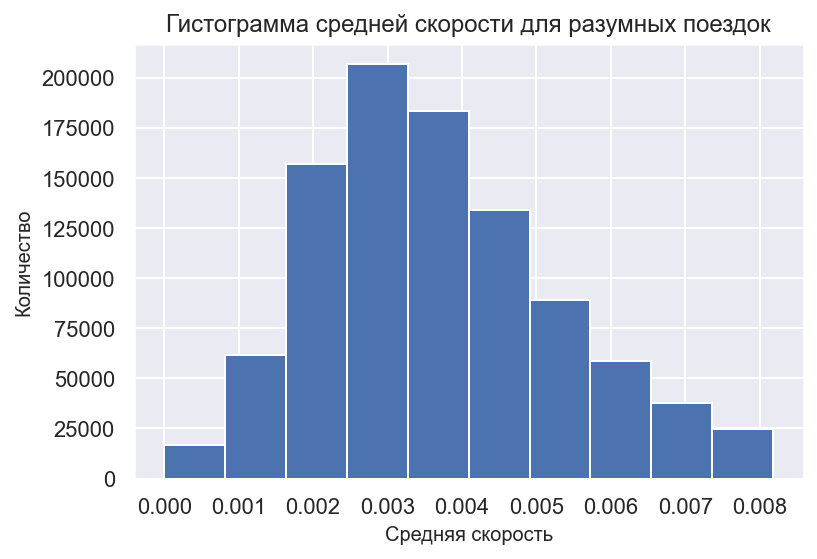

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# возьмем как на семинаре квантиль
avg_speed_quantile = train['average_speed'].quantile(.95)

# посмотрим на гистограмму
plt.hist((train[train['average_speed'] < avg_speed_quantile])['average_speed'])
plt.title('Гистограмма средней скорости для разумных поездок', fontsize=12)
plt.xlabel('Средняя скорость', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# опять же, аналогично семинару
day_hour_pairs = train.groupby(['pickup_weekday', 'pickup_hour']).mean()
ds = pd.pivot_table(data=day_hour_pairs, index='pickup_hour', columns='pickup_weekday', values='average_speed')

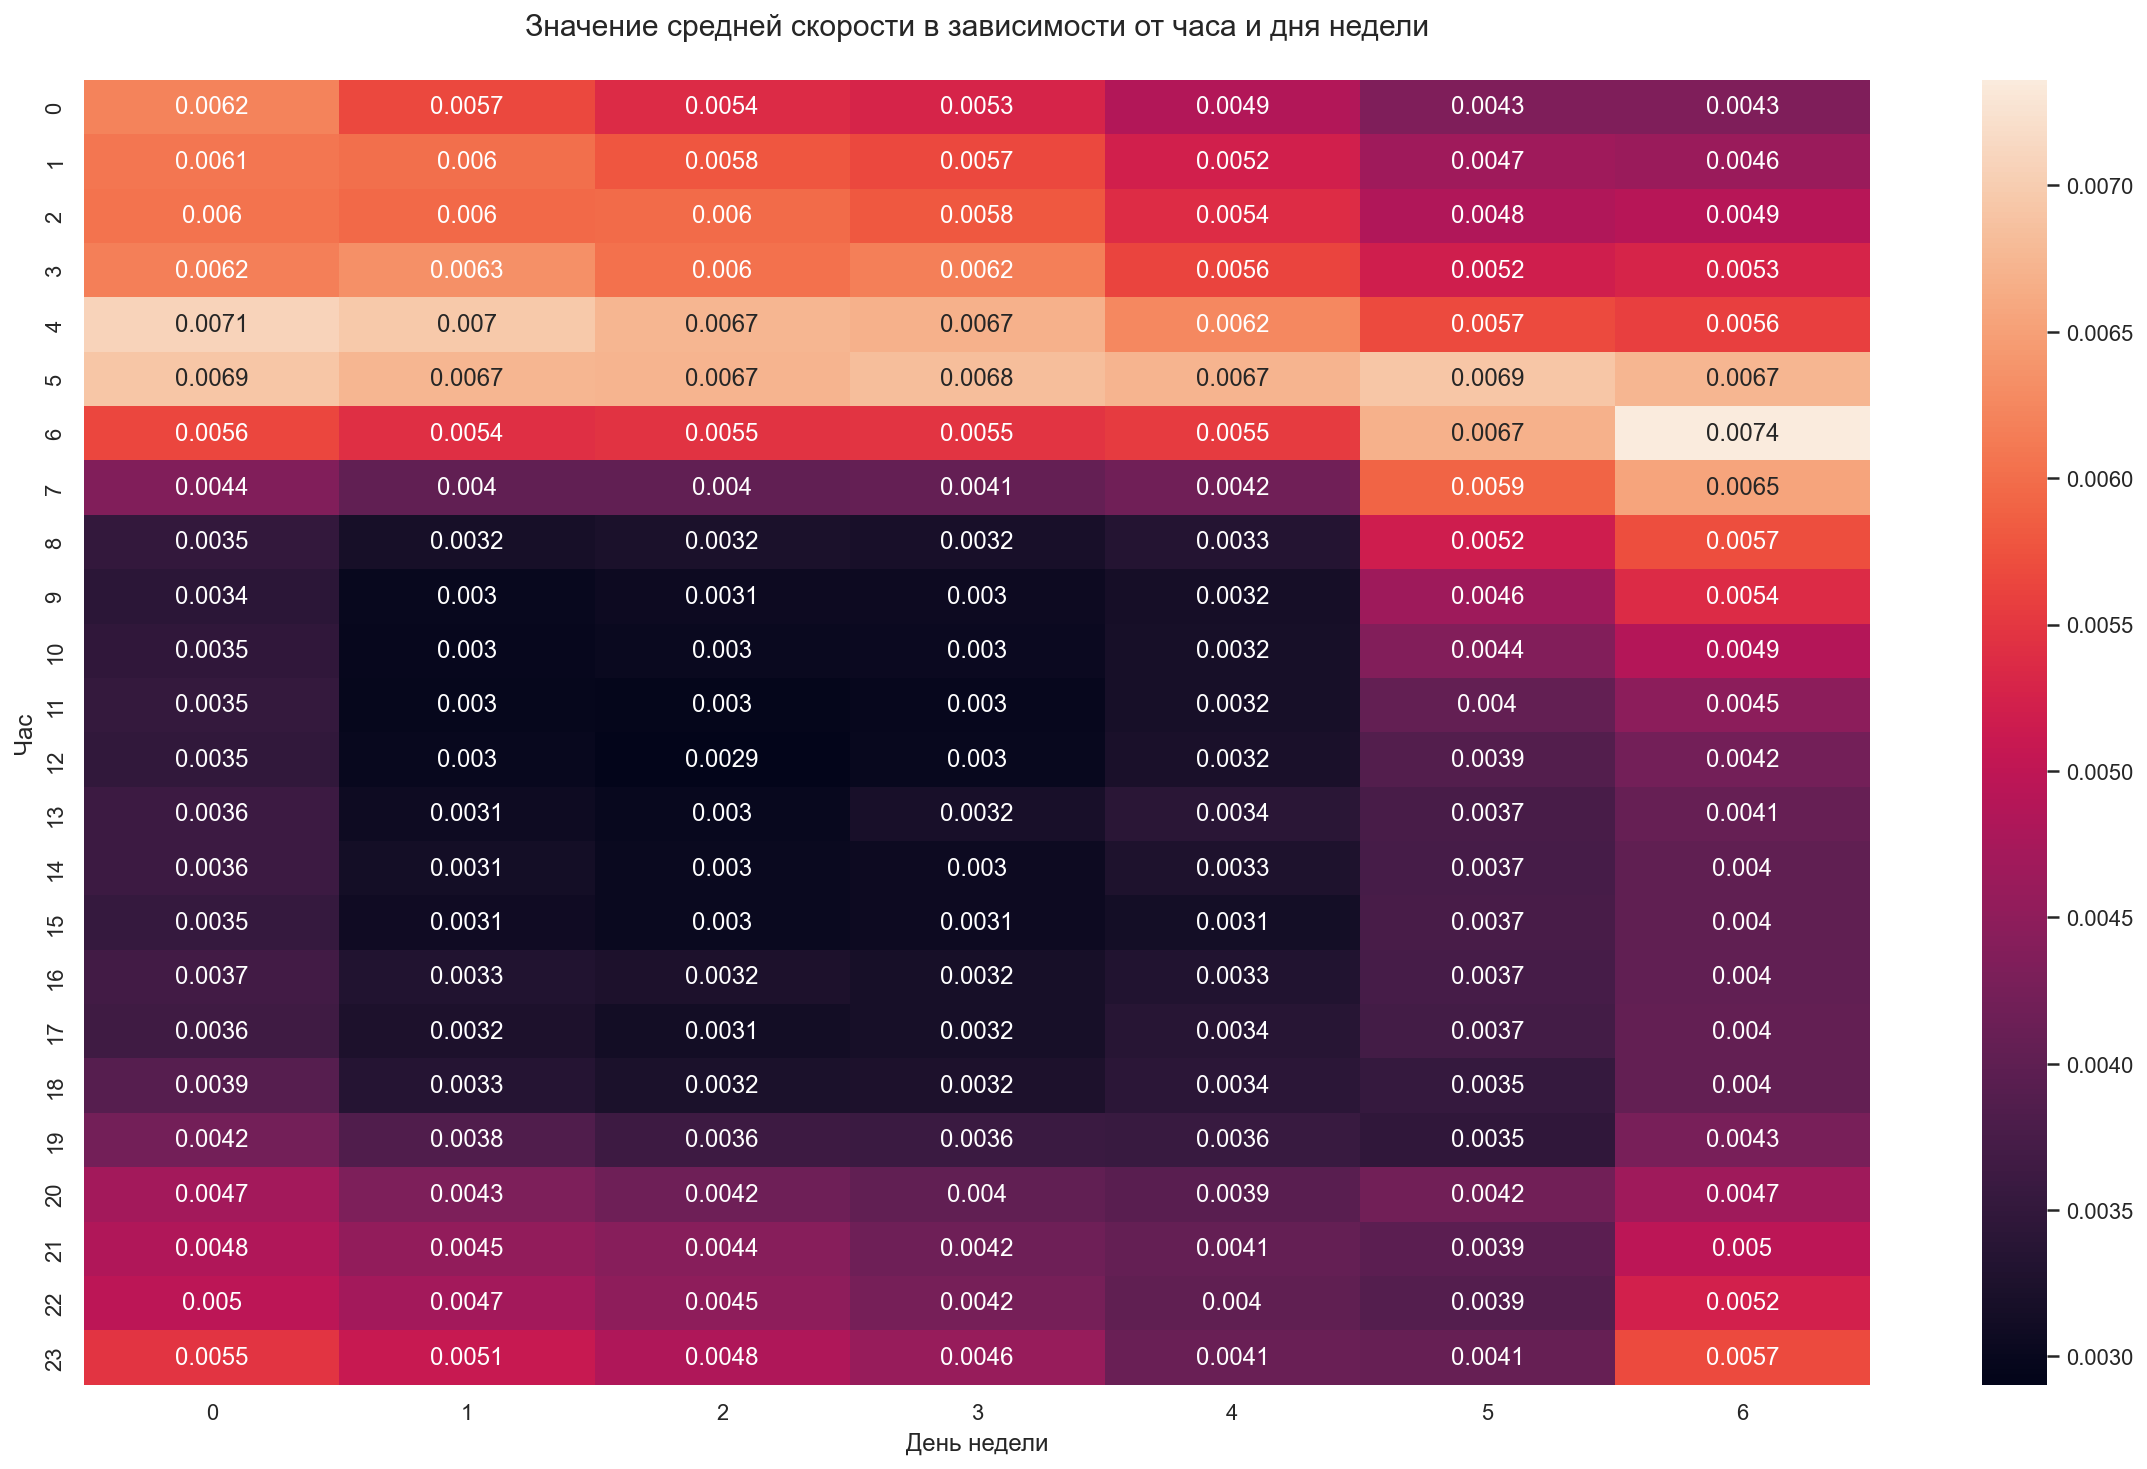

In [37]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(ds, ax=ax, annot=True);
ax.set_title('Значение средней скорости в зависимости от часа и дня недели\n', fontsize=15)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Час', fontsize=12)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Для получения средней скорости мы используем признак trip_duration, а это вообще-то наша целевая переменная (логарифм, если быть точным), которую мы и хотим предсказывать, следовательно средняя скорость нам недоступна во время обучения

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = train.drop(columns='average_speed')

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: внимательно посмотрев на график, отвечаю:
* Минимальна: в будние дни в середине дня (где черное пятно на графике)

* Максимальна: по ночам в будни с 0 до 6, по утрам в выходные с 5 до 7

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['traffic_jam'] = False
train['free_roads'] = False 

test['traffic_jam'] = False
test['free_roads'] = False 

for df in [train, test]:
    # удаляю по условиям из ответа выше
    is_traffic_jam = ((9 <= df['pickup_hour']) & (df['pickup_hour'] <= 18)) & \
                 ((0 <= df['pickup_weekday']) & (df['pickup_weekday'] <= 4))

    df.loc[is_traffic_jam, 'traffic_jam'] = True
    df.loc[is_traffic_jam, 'traffic_jam'] = True


    is_free_roads_weekday = ((0 <= df['pickup_hour']) & (df['pickup_hour'] <= 6)) & \
                     ((0 <= df['pickup_weekday']) & (df['pickup_weekday'] <= 4))

    is_free_roads_weekends = ((5 <= df['pickup_hour']) & (df['pickup_hour'] <= 7)) & \
                     ((5 <= df['pickup_weekday']) & (df['pickup_weekday'] <= 6))

    df.loc[is_free_roads_weekday, 'free_roads'] = True # свободный трафик в будни
    df.loc[is_free_roads_weekends, 'free_roads'] = True # свободный трафик в выходные

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# координаты аэропортов (взял из google maps)
airports = [(40.772523, -73.880649), (40.640826, -73.774055)]

train['pickup_airport'] = False
train['dropoff_airport'] = False

test['pickup_airport'] = False
test['dropoff_airport'] = False

for airport in airports:
    for df in [train, test]:
        df.loc[haversine_array(df['pickup_latitude'], df['pickup_longitude'], airport[0], airport[1]) < 1, 'pickup_airport'] = True
        df.loc[haversine_array(df['dropoff_latitude'], df['dropoff_longitude'], airport[0], airport[1]) < 1, 'dropoff_airport'] = True

In [41]:
# проверяю поездки, которые начались в аэропортах
show_circles_on_map(train[train['pickup_airport']==True].sample(10), "pickup_latitude", "pickup_longitude", "blue")

In [42]:
# проверяю поездки, которые закончились в аэропортах
show_circles_on_map(train[train['dropoff_airport']==True].sample(10), "dropoff_latitude", "dropoff_longitude", "blue")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

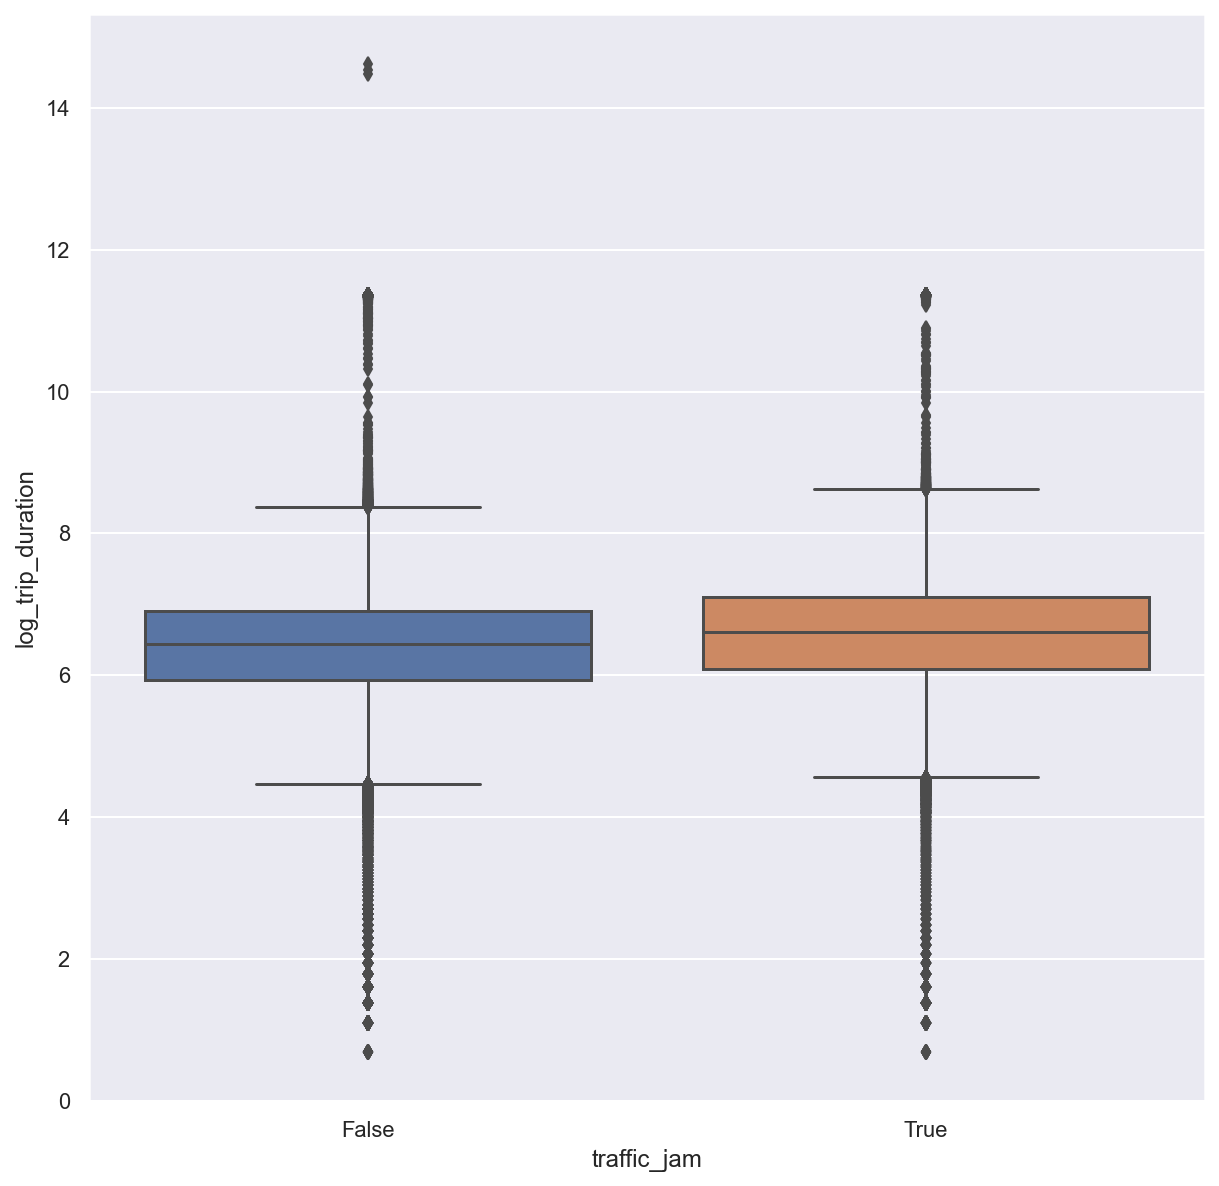

In [43]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10,10))
sns.boxplot(x='traffic_jam', y='log_trip_duration', data=train)
plt.show()

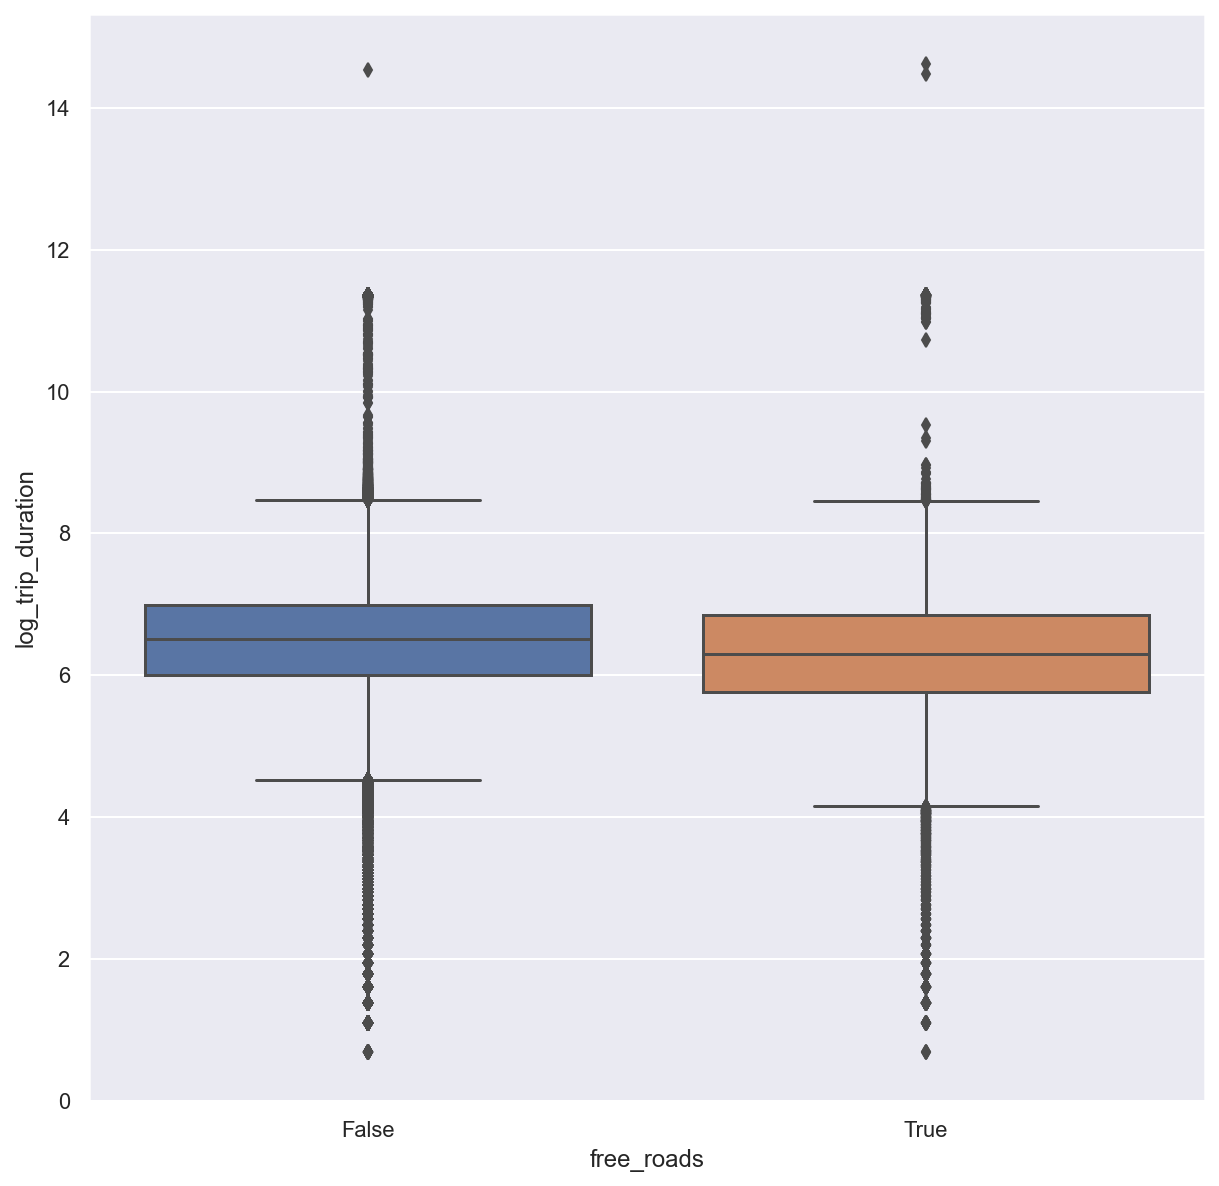

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10,10))
sns.boxplot(x='free_roads', y='log_trip_duration', data=train)
plt.show()

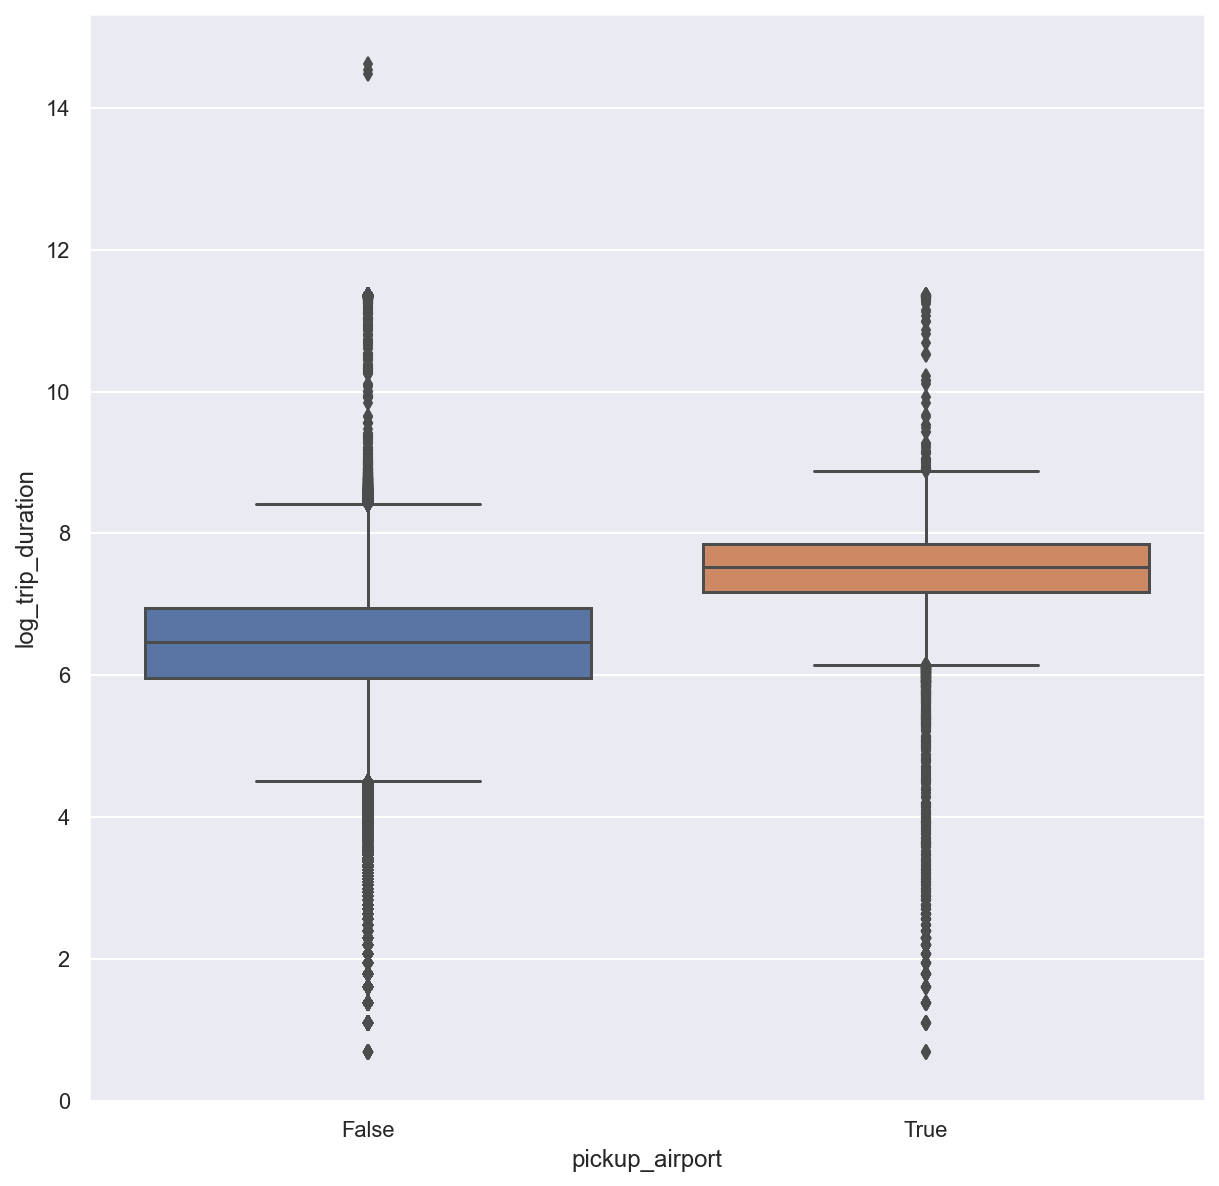

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10,10))
sns.boxplot(x='pickup_airport', y='log_trip_duration', data=train)
plt.show()

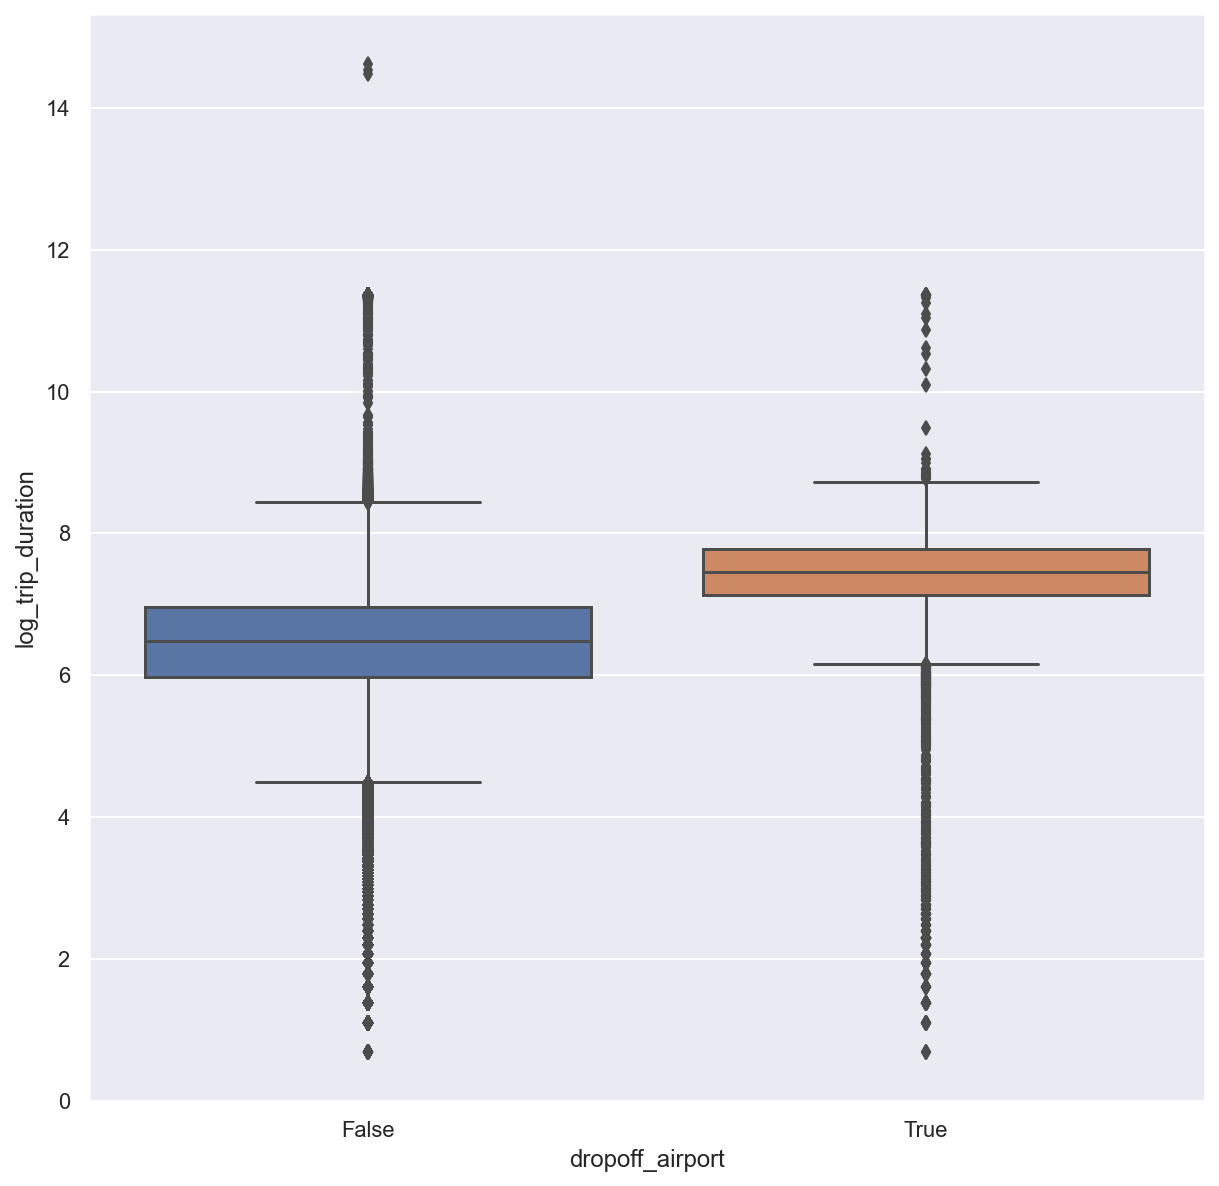

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x='dropoff_airport', y='log_trip_duration', data=train)
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: ящики у аэропортов достаточно узкие, следовательно  все поездки этого типа имеют маленький разброс длительности, возможно это хороший признак, у пробок такого свойства нет, так что этот признак не такой хороший, а еще везде есть выбросы...

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows_=4, cols_=3):
        """
        Args:
            rows: кол-во строчек
            cols: кол-во столбцов
            cell_nums: кол-во ячеек
            cells: массив ячеек
            leftup: верхний левый угол прямоугольника
            rightdown: правый нижний угол прямоугольника
        
        другие границы не пригодились, ибо для прямоугольника достаточно верхнего левого и нижнего правого
        self.leftdown = (40.707485, -74.021633) 
        self.rightup = (40.788466, -73.938431)
        """
        
        self.rows = rows_ 
        self.cols = cols_
        
        self.cell_nums = self.rows * self.cols 
        self.cells = [None] * self.cell_nums
        
        self.leftup = (40.794681, -73.997941)
        self.rightdown = (40.708758, -73.941976)
        
    def show_map(self, data, latitude_column, longitude_column, pickup):
        """
        Рисую координаты начала и конца поездок, которые случились в наших зонах, разными цветами
        
        Args:
            data: датафрейм поездок
            latitute_column: название колонки latitude
            longitude_column: название колонки longitude
            pickup: отображать поездки по признаку pickup_num или dropoff_num
        """
        colors = [
                    'red',
                    'blue',
                    'gray',
                    'darkred',
                    'lightred',
                    'orange',
                    'beige',
                    'green',
                    'darkgreen',
                    'lightgreen',
                    'darkblue',
                    'lightblue',
                    'purple',
                    'darkpurple',
                    'pink',
                    'cadetblue',
                    'lightgray',
                    'black'
        ]
        
        location = (data[latitude_column].mean(), data[longitude_column].mean())
        m = folium.Map(location=location)

        for _, row in data.iterrows():
            if pickup:
                folium.Circle(
                    radius=100,
                    location=(row[latitude_column], row[longitude_column]),
                    color=colors[row['pickup_num']],
                    fill_color=colors[row['pickup_num']],
                    fill=True
                ).add_to(m)
            else:
                folium.Circle(
                    radius=100,
                    location=(row[latitude_column], row[longitude_column]),
                    color=colors[row['dropoff_num']],
                    fill_color=colors[row['dropoff_num']],
                    fill=True
                ).add_to(m)
        return m
    
    def fit(self, X=None, y=None):
        """
        Изначально хранил и считал все 4 угла ячейки, но как оказалось это бесполезно
        и достаточно двух координат
        (а еще например правый верхний угол текущей ячейки == левый верхний угол следующей)

        Начинаю заполнять границы каждой из rows * cols ячеек,
        стартую из левой верхней точки и заполняю координаты со смещением по долготе и ширине,
        иду слева направо и вниз по ячейкам:
            Смещение по latitude:
                из правой нижней точки вычитаю левую верхнюю,
                получаю общую высоту прямоугольника,
                для смещения на 1 ячейку (1 шаг) делю высоту на self.rows

            Смещение по longitude:
                из правой нижней ячейки вычитаю левую верхнюю,
                получаю ширину прямоугольника,
                для смещения на 1 ячейку (1 шаг) делю ширину на self.cols
        """
        
        for row in range(self.rows): # ~ latitude (y)
            for col in range(self.cols): # ~ longitude (x) 
                offset_latitude = (self.rightdown[0] - self.leftup[0]) / self.rows
                offset_longitude = (self.rightdown[1] - self.leftup[1]) / self.cols
                
                """
                левый верхний угол текущей ячейки стартует из левого верхнего угла всего прямоугольника
                со смещением на row шагов вниз и на col шагов вправо
                """
                
                cell_leftup = [
                    self.leftup[0] + row * offset_latitude,
                    self.leftup[1] + col * offset_longitude
                ] 
      
                """
                правый нижний угол ячейки на 1 шаг ниже и на 1 шаг правее от верхнего левого угла ячейки
                """
        
                cell_rightdown = [
                    cell_leftup[0] + offset_latitude,
                    cell_leftup[1] + offset_longitude
                ]
                cur_cell = row * self.cols + col
                self.cells[cur_cell] = (cell_leftup, cell_rightdown)
        
        return self
    
    def transform(self, X, y=None):
        """
        Для каждой ячейки нахожу принадлежащие (pickup и dropoff) к ней поездки
        """
        
        def is_in_cell(latitude, longitude, cell_leftup, cell_rightdown):
            return (longitude >= cell_leftup[1]) & (longitude <= cell_rightdown[1]) & (latitude <= cell_leftup[0]) & (latitude >= cell_rightdown[0]) 
    
        X_transform = X.copy()
        X_transform['pickup_num'] = -1
        X_transform['dropoff_num'] = -1
        
        for cur_cell in range(self.cell_nums):
            is_pickup_cell = is_in_cell(X_transform['pickup_latitude'], X_transform['pickup_longitude'], self.cells[cur_cell][0], self.cells[cur_cell][1])
            X_transform.loc[is_pickup_cell, 'pickup_num'] = cur_cell
            
            is_dropoff_cell = is_in_cell(X_transform['dropoff_latitude'], X_transform['dropoff_longitude'], self.cells[cur_cell][0], self.cells[cur_cell][1])
            X_transform.loc[is_dropoff_cell, 'dropoff_num'] = cur_cell
        
        return X_transform

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [48]:
# добавляю новые признаки из трансформера
transformer = MapGridTransformer(4, 3)
transformer.fit() # dataframe для fit не требуется
train = transformer.transform(train)
test = transformer.transform(test)

In [49]:
# рисую начала поездок по зонам
transformer.show_map(train[train['pickup_num']!=-1].sample(1000), 'pickup_latitude', 'pickup_longitude', pickup=True)

In [50]:
# рисую концы поездок по зонам
transformer.show_map(train[train['dropoff_num']!=-1].sample(1000), 'dropoff_latitude', 'dropoff_longitude', pickup=False)

In [51]:
train

id  vendor_id     pickup_datetime  passenger_count  \
963784   id0285759          2 2016-05-01 11:15:37                2   
646942   id2405975          2 2016-05-15 15:26:15                1   
323748   id1499695          2 2016-05-25 11:20:55                1   
1151206  id3418601          2 2016-03-07 09:15:06                2   
169097   id1988986          2 2016-05-02 09:12:38                1   
...            ...        ...                 ...              ...   
942761   id0967359          2 2016-02-02 16:26:43                1   
102486   id2759562          1 2016-04-23 23:53:20                1   
135892   id2026311          1 2016-02-18 17:23:37                1   
534484   id2336270          2 2016-03-22 23:37:43                2   
654188   id3952139          2 2016-02-21 18:43:43                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
963784         -73.981758        40.732540         -74.002113   
646942         -74.005096        40.719940         -73.993790   
323748         -74.002373        40.745140         -74.002533   
1151206        -73.978096        40.754868         -73.988419   
169097         -73.969040        40.766010         -73.963882   
...                   ...              ...                ...   
942761         -73.807297        40.656197         -74.309311   
102486         -73.948975        40.777393         -73.954102   
135892         -74.006783        40.733036         -74.015282   
534484         -73.968132        40.762409         -73.975159   
654188         -73.952698        40.772518         -73.970856   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  ...  \
963784          40.755821                  N           6.532334  ...   
646942          40.730289                  N           6.536692  ...   
323748          40.738941                  N           5.680173  ...   
1151206         40.759335                  N           6.124683  ...   
169097          40.773731                  N           5.624018  ...   
...                   ...                ...                ...  ...   
942761          40.689186                  N           8.419580  ...   
102486          40.786411                  N           5.717028  ...   
135892          40.704758                  N           6.714171  ...   
534484          40.752041                  N           5.645447  ...   
654188          40.798489                  N           6.733402  ...   

        abnormal_winter  abnormal_summer  haversine  haversine_log  \
963784            False            False   3.105187       1.412251   
646942            False            False   1.494040       0.913904   
323748            False            False   0.689416       0.524383   
1151206           False            False   1.001334       0.693814   
169097            False            False   0.962138       0.674035   
...                 ...              ...        ...            ...   
942761            False            False  42.496045       3.772670   
102486            False            False   1.091718       0.737986   
135892            False            False   3.224960       1.441010   
534484            False            False   1.295946       0.831145   
654188            False            False   3.267477       1.451023   

         traffic_jam  free_roads  pickup_airport  dropoff_airport  pickup_num  \
963784         False       False           False            False           6   
646942         False       False           False            False          -1   
323748          True       False           False            False          -1   
1151206         True       False           False            False           4   
169097          True       False           False            False           4   
...              ...         ...             ...              ...         ...   
942761          True       False           False            False          -1   
102486         False       False        

In [52]:
features += [
    'haversine_log', 'traffic_jam', 'free_roads',
    'pickup_airport', 'dropoff_airport',
    'pickup_num', 'dropoff_num'
]

In [53]:
categorical += ['pickup_num', 'dropoff_num']
numeric_features += ['haversine_log']

In [54]:
# разбиваю выборку
X_train = train[features]
X_test = test[features]

y_train = train[['log_trip_duration']]
y_test = test[['log_trip_duration']]

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# заимствую код с 2 семинара
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4863


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**:

* vendor_id: какая-то компания может совершать поездки только в одной зоне, может возить только в аэропорты, может совершать только короткие/длинные поездки и т.д

* passenger_count: возможно чем больше пассажиров, тем длительнее поездка, потому что возможно им нужны разные точки (хотя тут поездка из точки А в точку Б, но мало ли) или они просто едут далеко, поездки с одним пассажиром наверное на короткие дистанции

* store_and_fwd_flag: если поездки не сохраняются, возможно это более некачественное такси и люди отменяют поездки на половине пути (условно говоря)


Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f"vendor_id unique: {train['vendor_id'].nunique()}")
print(f"passenger_count unique: {train['passenger_count'].nunique()}")
print(f"store_and_fwd_flag unique: {train['store_and_fwd_flag'].nunique()}")

vendor_id unique: 2
passenger_count unique: 10
store_and_fwd_flag unique: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

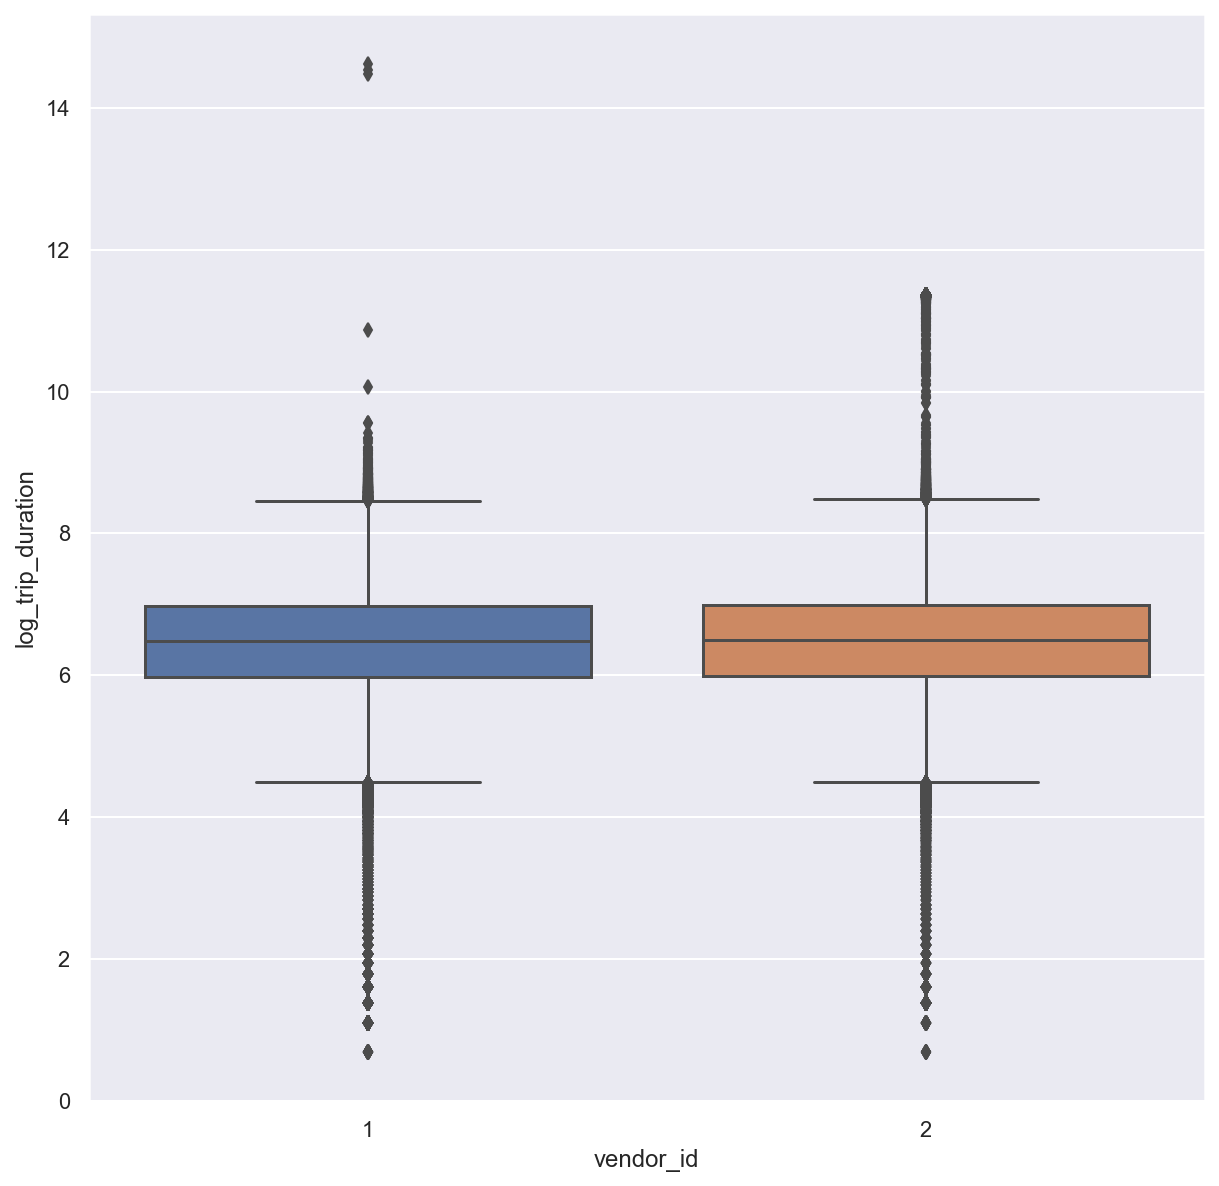

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10,10))
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train)
plt.show()

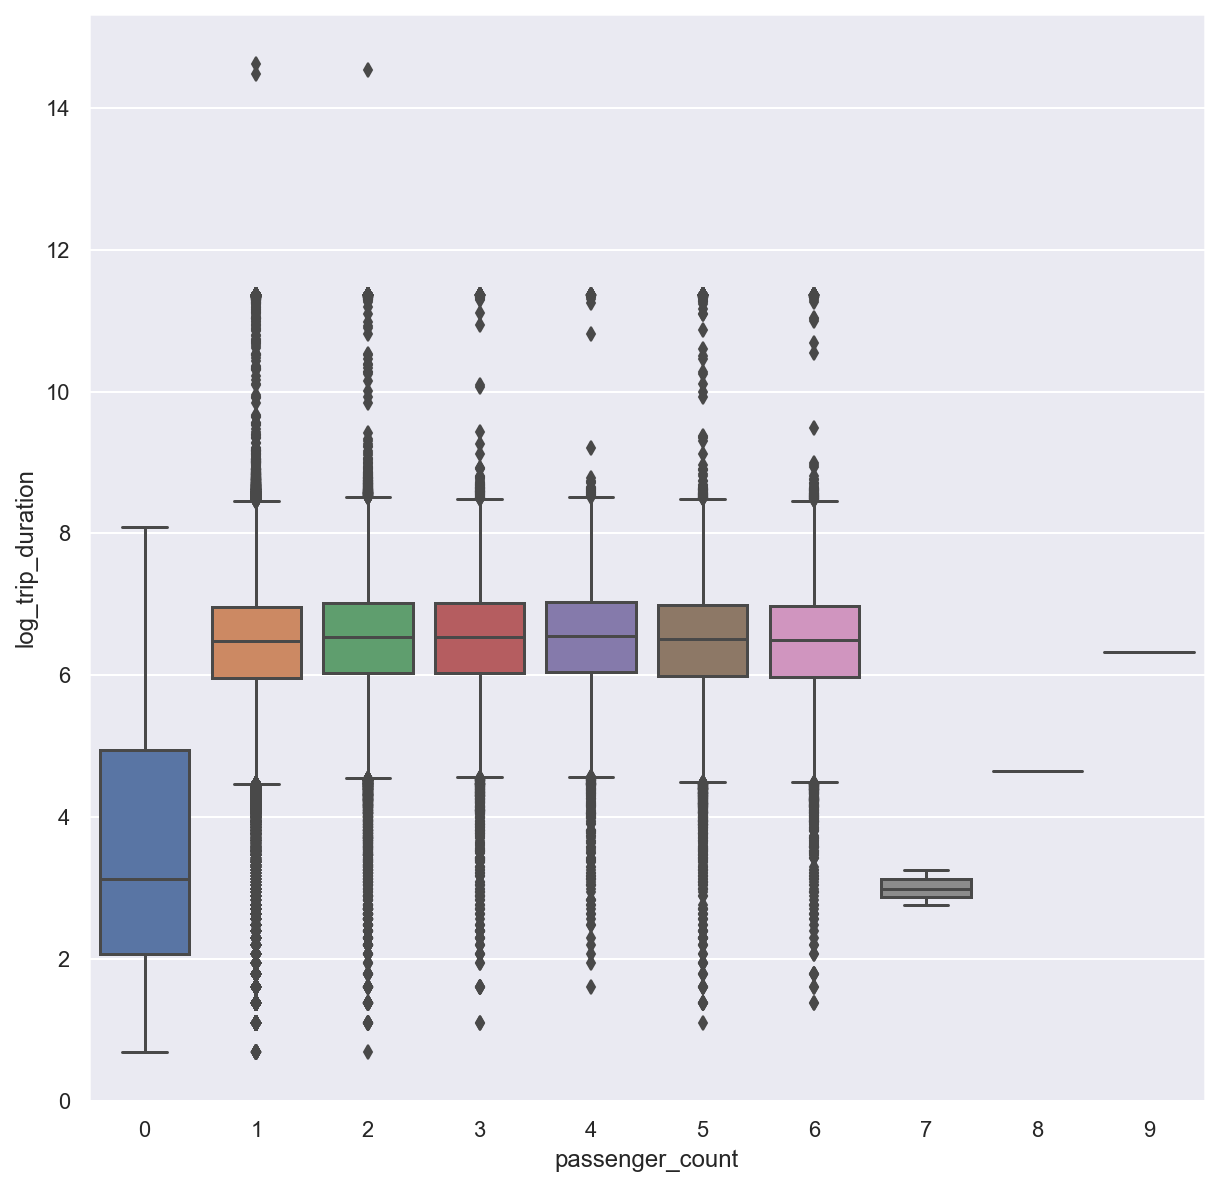

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train)
plt.show()

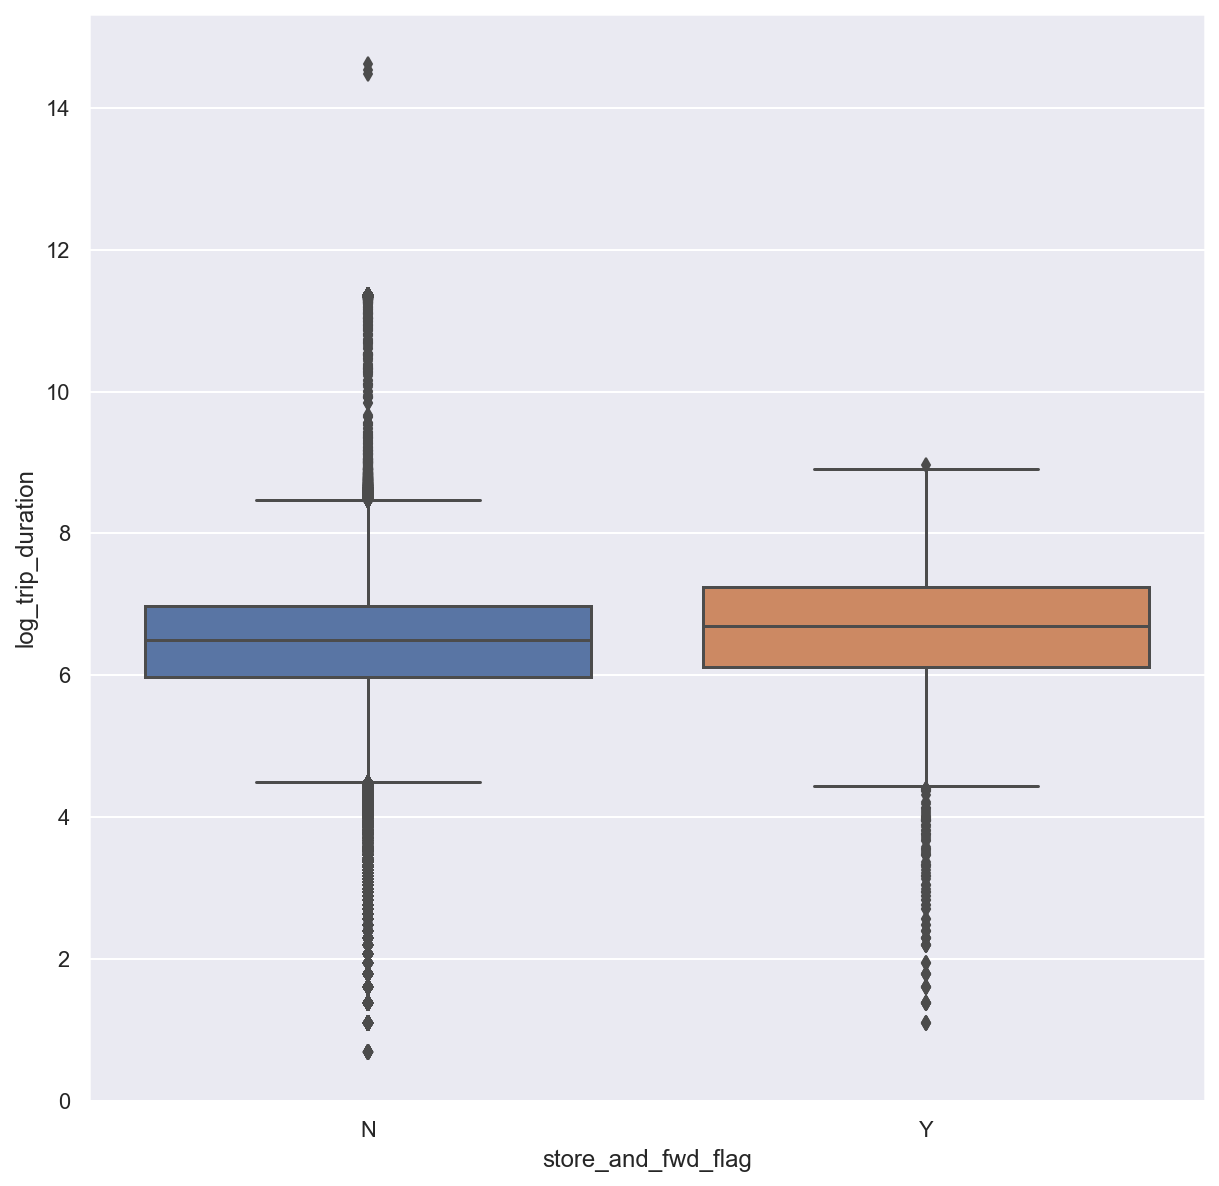

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train)
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [60]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for df in [train, test]:
    df['vendor_id'] = df['vendor_id'] - 1
    df['store_and_fwd_flag'] = 1 * (df['store_and_fwd_flag'] == 'Y') # if Y then 1 * True else 1 * False

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: думаю, что нет, потому что графики похожи и не различаются в зависимости от этих признаков

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [61]:
features += ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

In [62]:
X_train = train[features]
X_test = test[features]

y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [63]:
categorical += ['vendor_id', 'passenger_count']

In [64]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# заимствую код с 2 семинара
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4859


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Как видим, RMSE особо не изменилась, значит признаки можно просто выбросить и забить

In [65]:
train = train.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])
test = test.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

categorical.remove('vendor_id')
categorical.remove('passenger_count')

features.remove('vendor_id')
features.remove('passenger_count')
features.remove('store_and_fwd_flag')

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

удаляю: 35458


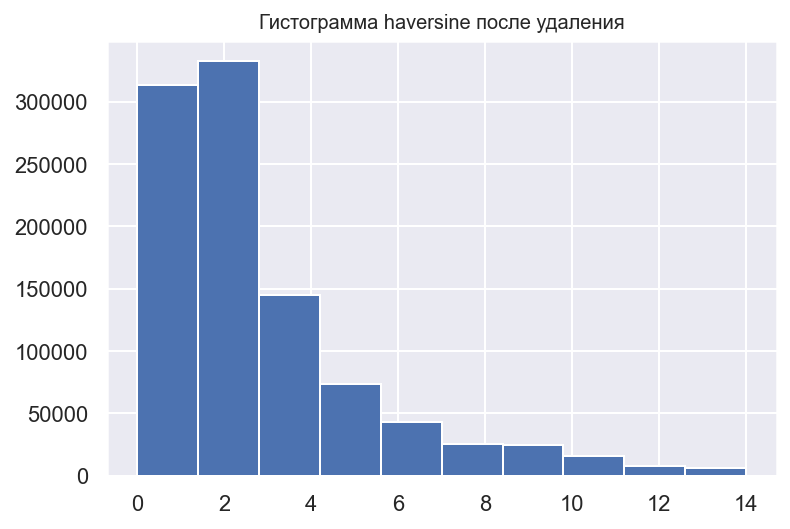

In [66]:
# аналогично для haversine
haversine_good = train[train['haversine'] < 14]
print('удаляю:', train.shape[0] - haversine_good.shape[0])
plt.hist(haversine_good['haversine'])
plt.title('Гистограмма haversine после удаления', fontsize=10)
plt.show()

In [67]:
train = haversine_good

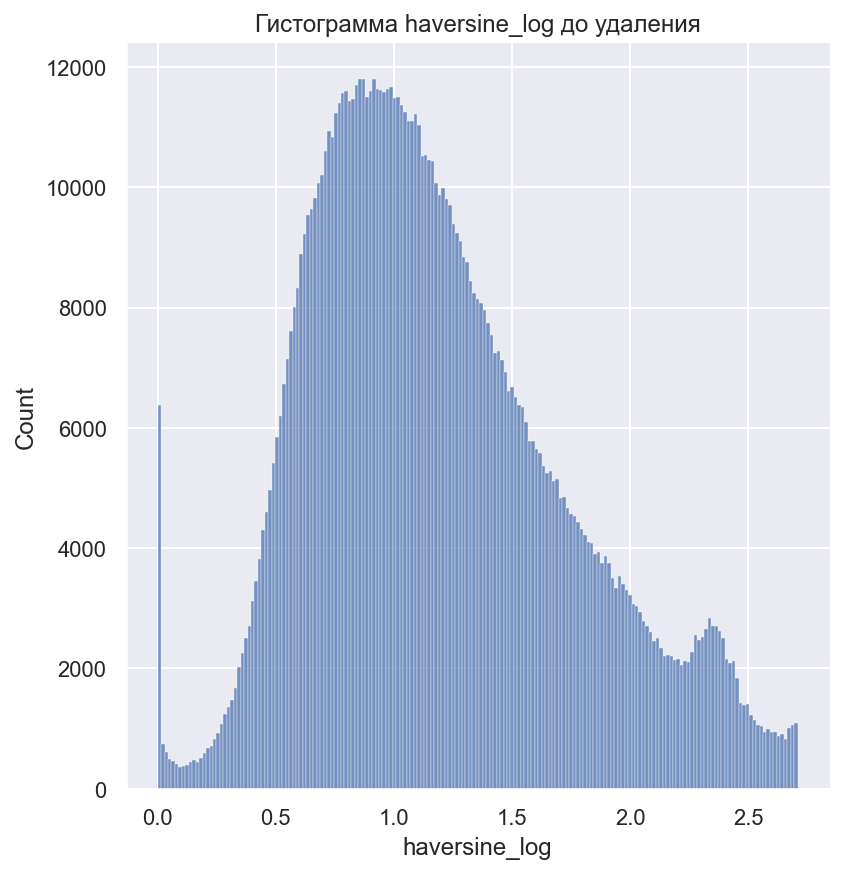

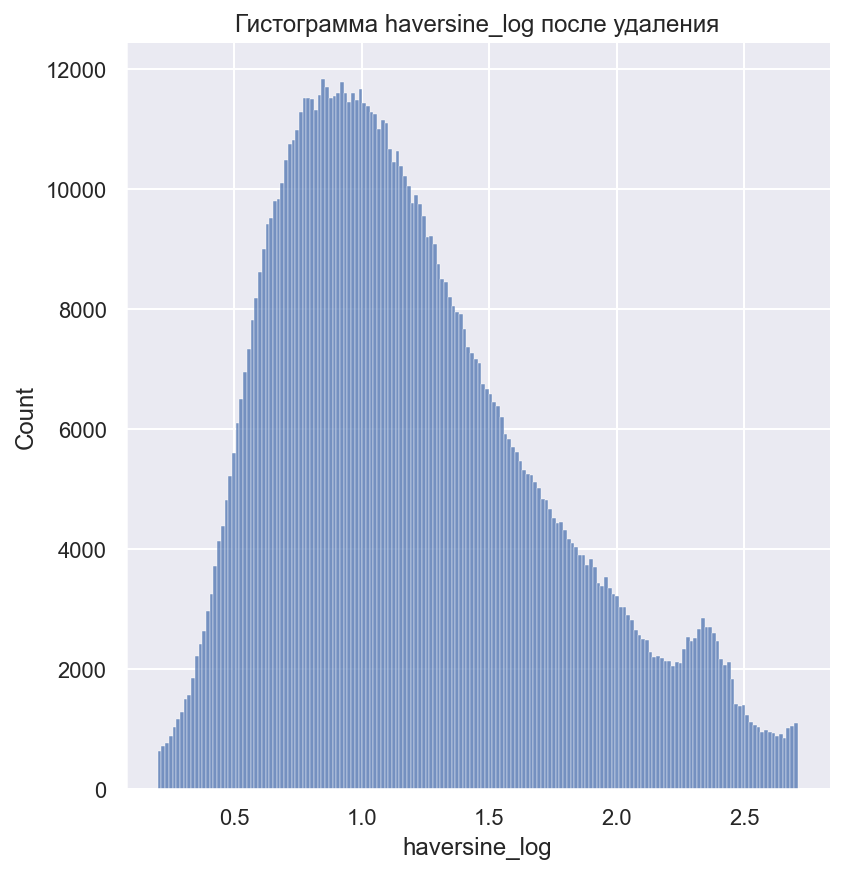

In [68]:
# а еще посмотрю для логарифма
sns.displot(train['haversine_log'], height=6)
plt.title('Гистограмма haversine_log до удаления')
haversine_log_good = train[(0.2 < train['haversine_log']) & (train['haversine_log'] < 3.0)]
sns.displot(haversine_log_good['haversine_log'], height=6)
plt.title("Гистограмма haversine_log после удаления")
plt.show()

In [69]:
train = haversine_log_good

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# ищем редкие категории
for category in categorical:
    print(train.groupby(category).count()['id'])

pickup_hour
0     35387
1     25894
2     18790
3     13990
4     10142
5      9337
6     21382
7     37203
8     45137
9     45887
10    44105
11    46085
12    48107
13    47393
14    49231
15    47514
16    42191
17    50806
18    60974
19    60875
20    56271
21    56217
22    53824
23    46361
Name: id, dtype: int64
pickup_weekday
0    124684
1    135471
2    140744
3    145471
4    149233
5    148027
6    129473
Name: id, dtype: int64
pickup_yearday
1      4720
2      4344
3      4186
4      4403
5      4751
       ... 
178    4655
179    4877
180    4875
181    5089
182    5026
Name: id, Length: 182, dtype: int64
pickup_num
-1     228065
 0      26531
 1      52442
 2      64701
 3     132160
 4     151244
 5      37485
 6     171727
 7      37016
 8       1094
 9      63407
 10      3705
 11      3526
Name: id, dtype: int64
dropoff_num
-1     272884
 0      26287
 1      51292
 2      68305
 3     117863
 4     138299
 5      38644
 6     146709
 7      41144
 8       3619
 9  

Вижу маленькие категории зон поездок, обьединю их все в соседнюю большую

In [71]:
for df in [train, test]:
    df.loc[(df['pickup_num'] == 8) | (df['pickup_num'] == 10) | (df['pickup_num'] == 11), 'pickup_num'] = 9
    df.loc[(df['dropoff_num'] == 8) | (df['dropoff_num'] == 10) | (df['dropoff_num'] == 11), 'dropoff_num'] = 9

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# разбиваю выборку
X_train = train[features]
X_test = test[features]

y_train = train[['log_trip_duration']]
y_test = test[['log_trip_duration']]

In [73]:
# заимствую код с 2 семинара

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4886


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [74]:
features

['pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'pickup_yearday',
 'abnormal_winter',
 'abnormal_summer',
 'haversine_log',
 'traffic_jam',
 'free_roads',
 'pickup_airport',
 'dropoff_airport',
 'pickup_num',
 'dropoff_num']

In [75]:
categorical

['pickup_hour',
 'pickup_weekday',
 'pickup_yearday',
 'pickup_num',
 'dropoff_num']

In [76]:
numeric_features

['pickup_month', 'haversine_log']

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
onehot = OneHotEncoder(handle_unknown='ignore')
X_with_onehot = onehot.fit_transform(X_train[categorical])
print(f"До кодирования: {X_train.shape[1]}")
print(f"После кодирования: {X_with_onehot.shape[1]}")

До кодирования: 13
После кодирования: 233


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [78]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7957


**Вывод**: Ridge регрессия лучше

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [79]:
new_train, valid = train_test_split(train, test_size=0.2, random_state=111)

X_train = new_train[features]
X_valid = valid[features]
X_test = test[features]

y_train = new_train['log_trip_duration']

y_valid = valid['log_trip_duration']

y_test = test['log_trip_duration']

Best alpha = 4.2813


Text(0, 0.5, 'CV score')

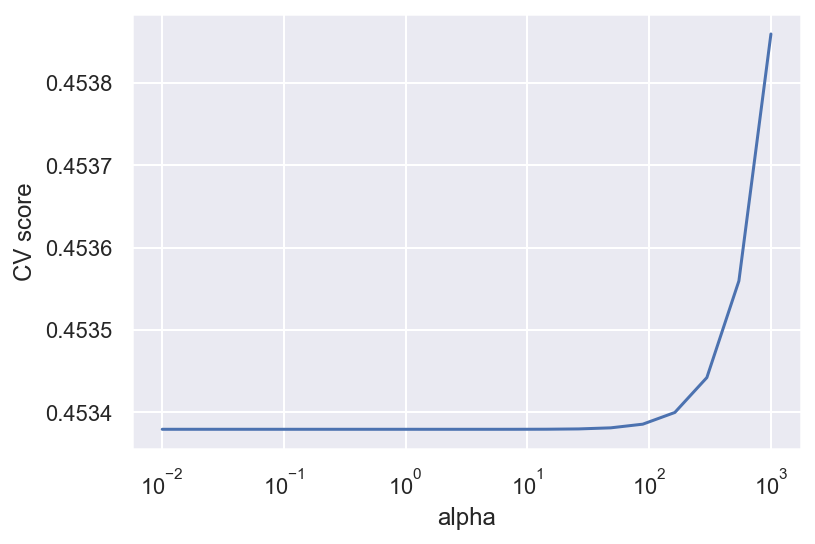

In [80]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# код с семинара 2
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_valid, y_valid)

best_alpha_ridge = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha_ridge)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")


In [81]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4886


Best alpha = 0.0001


Text(0, 0.5, 'CV score')

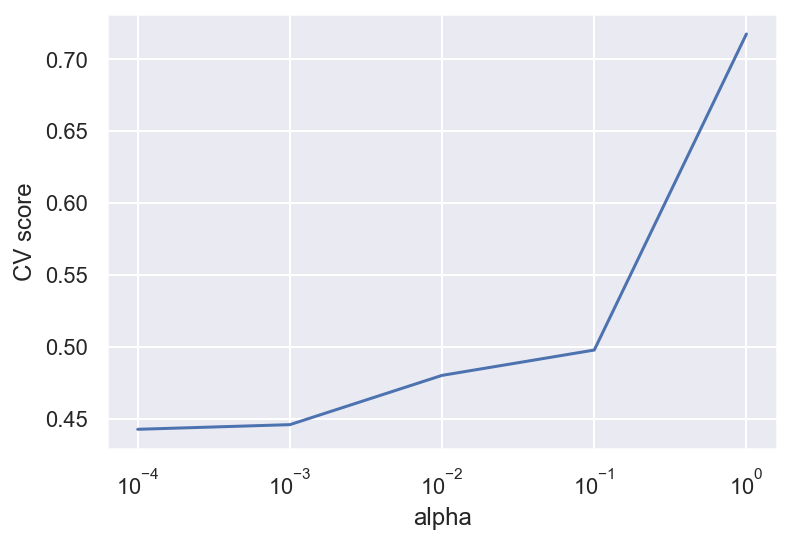

In [82]:
alphas = np.logspace(-4, 0, 5) # эксперементальным путем установил хорошие границы, чтобы не считать вечность
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_valid, y_valid)

best_alpha_lasso = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha_lasso)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [83]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4888


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [84]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
"""
Пройдемся по каждой alpha, заново пройдем весь пайплайн и посмотрим на кол-во нулевых весов
"""
lasso_zeros = []
for cur_alpha in alphas:
    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(cur_alpha))
    ])

    model = pipeline.fit(X_train, y_train)
    lasso_zeros.append(np.sum(pipeline.steps[-1][-1].coef_ == 0))

print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: [78, 186, 228, 234, 235]


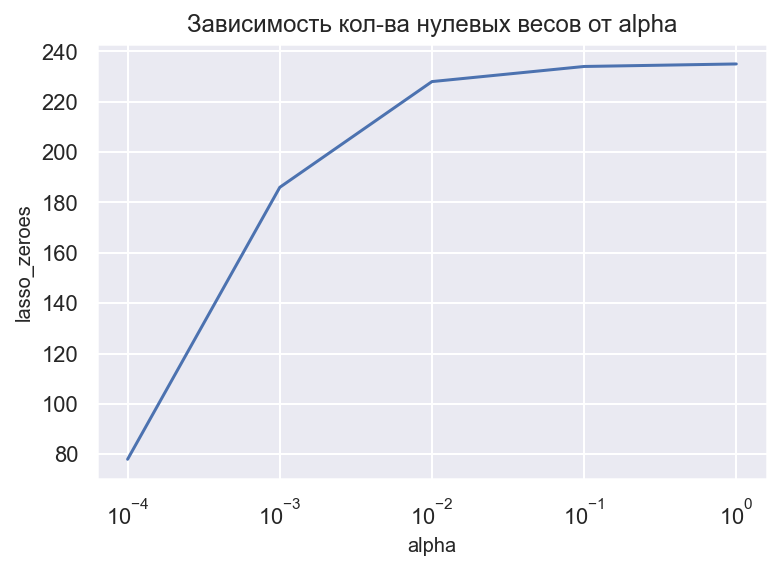

In [85]:
plt.plot(alphas, lasso_zeros)
plt.title('Зависимость кол-ва нулевых весов от alpha', fontsize=12)
plt.xscale('log')
plt.xlabel('alpha', fontsize=10)
plt.ylabel('lasso_zeroes', fontsize=10)
plt.show()

In [86]:
optimal_alpha_for_zeroes = 0.01

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(optimal_alpha_for_zeroes))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.5204


**Ответ**: При alpha ~ 0.0100 мы получаем ошибку ~0.52, при этом зануляется сильно больше половины признаков (видим на графике выше), значит потерять в качестве придется НЕ сильно (а можно еще боле строго понизить альфу и получить еще меньшую ошибку)

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: 
* по маршруту проще понять длительность поездки, поездки одного маршрута в среднем должны иметь схожую длительность поездки

* линейная модель на то и линейная, что не умеет в взаимодействия и зависимости признаков, а рассматривает каждый признак отдельно, следовательно "вытащить" информацию она никак не сможет

In [87]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
"""
Решил вместо категориального добавить численный признак с коэфом от 100 до 1 в порядке убывания частоты
данного маршрута,
при категориальном у меня почему-то очень долго работает обучение, не знаю почему (решил забить)
"""

train['route'] = -1
test['route'] = -1
combinations = train[(train['pickup_num'] != -1) & (train['dropoff_num'] != -1)].groupby(by=['pickup_num', 'dropoff_num']).count()['id'].sort_values(ascending=False)
combinations = combinations[0:100]
coef = 100
for comb in combinations.index:
    train.loc[(train['pickup_num'] == comb[0]) & (train['dropoff_num'] == comb[1]), 'route'] = coef
    test.loc[(test['pickup_num'] == comb[0]) & (test['dropoff_num'] == comb[1]), 'route'] = coef
    coef -= 1

/var/folders/ms/2t2k2f6d1bl21qgljmzt_5s80000gn/T/ipykernel_2834/2799972182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['route'] = -1


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [88]:
features += ['route']

In [89]:
numeric_features += ['route']

In [90]:
new_train, valid = train_test_split(train, test_size=0.2, random_state=111)

X_train = new_train[features]

X_valid = valid[features]

X_test = test[features]

y_train = new_train['log_trip_duration']

y_valid = valid['log_trip_duration']

y_test = test['log_trip_duration']

In [91]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_ridge))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4870


Получилось еще немного улучшить качество

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [92]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [93]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [94]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

***Эмоций нет никаких, устал переделывать по несколько раз один и тот же код***